<div id="container" style="position:relative;">
<div style="float:left"><h1> Predicting Obesity Levels Using Lifestyle & Biometric Data</h1></div>


**Author:** Elham Rahimi

**Date:** June 10, 2025  

**Context:** This project predicts obesity levels using lifestyle and biometric data. The goal is to identify actionable habits that contribute most to obesity risk..

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import scipy.stats as stats


# Table of Contents
- [Introduction](#Introduction)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Dataset Overview](#Data-Overview)
- [Data Preprocessing](#Data-Preprocessing)
  - [Feature Engineering](#Feature-Engineering)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Low Variant Features](#Features-with-Low-Variance)
  - [Obesity Class Distribution](#Obesity-Level-Distribution)
  - [Bivariate Analysis](#Bivariate-Analysis)
  - [Correlation Heatmap](#Correlation-Heatmap)
  - [Grouped PCA](#Grouped-PCA)
- [Baseline Model](#Baseline-Model)
  - [Logistic Regression](#Logistic-Regression)
    - [Multicollinearity](#Multicollinearity)
    - [Linearity of the logit](#Linearity-of-the-logit)
    - [Regular Dataset, Grouped PCA, PCA](#Regular-Dataset,-Grouped-PCA,-PCA)
    - [Logistic Regression: Hyperparameter Tuning with Pipelining](#Logistic-Regression:-Hyperparameter-Tuning-with-Pipelining)
    - [Logistic Regression: Model Evaluation](#Logistic-Regression:-Model-Evaluation)
      - [Logistic Regression: Classification Report](#Logistic-Regression:-Classification-Report)
      - [Logistic Regression: Confusion Matrix](#Logistic-Regression:-Confusion-Matrix)
  - [Decision Trees](#Decision-Trees)
    - [Parameters](#Parameters)
    - [Decision Trees: Hyperparameter Tuning with Pipelining](#Decision-Trees:-Hyperparameter-Tuning-with-Pipelining)
    - [Decision Trees: Model Evaluation](#Decision-Trees:-Model-Evaluation)
      -  [Decision Trees: Classification Report](#Decision-Trees:-Classification-Report)
      -  [Decision Trees:  Confusion Matrix](#Decision-Trees:-Confusion-Matrix)
  - [Random Forest ](#Random-Forest)
    -  [Random Forest: Hyperparameter Tuning with Pipelining](#Random-Forest:-Hyperparameter-Tuning-with-Pipelining)
    -  [Overfitting Test](#Train-vs-Test-Accuracy)
- [Model Evaluation](#Model-Evaluation)
  - [Classification Report Analysis](#Classification-Report-Analysis)
  - [Confusion Matrix](#Confusion-Matrix)
- [Model Interpretation](#Model-Interpretation)
  - [Feature Importance](#Feature-Importance)
  - [Permutation Feature Importance](#Permutation-Feature-Importance)
- [The Winning Model](#The-Winning-Model)
- [Conclusion](#Conclusion)

# Introduction

## Predicting Obesity With Machine Learning
------------------

Obesity is a growing global health concern, closely linked to conditions like diabetes, heart disease, and sleep apnea. Since prevention is far more effective than treatment, early prediction is essential.

For this project, I’m training a machine learning model on a dataset of over 21,000 entries, using features such as height, weight, eating habits, and physical activity levels. The goal is to classify individuals into specific obesity risk categories and generate personalized insights that can guide healthier lifestyle choices. This model isn't just helpful for individuals, it can also support businesses like gyms, nutrition programs, and meal planning services in offering more tailored solutions.

Machine learning is a powerful fit for this kind of problem because it can uncover patterns that aren’t immediately visible. I'm using models like Logistic Regression, Decision Trees, and Random Forest, which are well-suited for classification tasks and help increase prediction accuracy. Previous studies have shown the effectiveness of this approach, and my aim is to build on that foundation with a solution that’s practical.

Ultimately, this project is about empowering people to take proactive steps, making it easier to stay ahead of obesity instead of trying to reverse it later.

------------------

# Exploratory Data Analysis

## Data Overview

### Data Dictionary


| Column Name     | Description                            | Data Type | Possible Values / Units | Example |
|----------------|--------------------------------------|----------|----------------------|---------|
| id             | Unique identifier for each person   | Integer  | N/A                  | 123456  |
| Gender         | Gender of each person                 | String   | "Female", "Male" | "Female" |
| Age    | Age of each person          | Float   | 14-61  | 25 |
| Height | Height of each person           | Float | Meters  | 1.70 |
| Weight  | Weight of each person        | Float  | Kgs | 70 |
| family_history_with_overweight    | Whether the Person has an obese family member or not | Boolean   | 0 or 1  | 0 |
| FAVC    | Frequent consumption of high-caloric food | Boolean   | 0 or 1  | 0 |
| FCVC    | Frequency of consumption of vegetables | Float   | 1 - 3   | 2 |
| NCP    | Number of main meals | Float   | 1-4   | 3 |
| CAEC    | Consumption of food between meals | String (Categorical)   | ['Sometimes', 'Frequently', '0', 'Always']   | 'Sometimes' |
| SMOKE    | Whether person is a smoker or not | Boolean   | 0 or 1  | 0 |
| CH2O    | Daily water consumption | Float   | 1 - 3 (Units not given)  | 2.6 |
| SCC    | Caloric beverages consumption | Boolean   | 0 or 1  | 0 |
| FAF    | Physical activity frequency | Float | 0 - 3 (Units not given) | 2.4 |
| TUE    | Time spent using technological devices| Float | 0 - 2 (Units not given) | 1.7 |
| CALC    | Consumption of alcohol| String (Categorical)   | ['Sometimes', 'Frequently', '0', 'Always']   | 'Sometimes' |
| MTRANS    | Mode of transportation| String (Categorical)   | ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']  | 'Bike' |
| 0be1dad    | Obesity Level| String (Categorical)   | ['Overweight_Level_II', '0rmal_Weight', 'Insufficient_Weight','Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I','Obesity_Type_I']  | 'Overweight_Level_I' |



In [8]:
# Reading in the data

df = pd.read_csv('obesity_level.csv')

In [9]:
# Finding shape of data

df.shape

(20758, 18)

In [10]:
# Dropping any duplicates

df = df.drop_duplicates()

In [11]:
# Identifying null values

null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


### Cleaning up the columns 

In [13]:
# Remove id since it's the same as index

df = df.drop(columns=['id'])

In [14]:
# Renaming columns and fixing any spelling mistakes

df = df.rename(columns={'CH2O': 'water'})

df = df.rename(columns={'FAF': 'physical_activity_freq'})

df = df.rename(columns={'CALC': 'alcohol_con'})

df = df.rename(columns={'0be1dad': 'obesity_level'})

df['obesity_level'] = df['obesity_level'].replace({'0rmal_Weight': 'Normal_Weight'})

------------------

The CAEC column (Consumption of food between meals) has the following unique options: Sometimes, Frequency, Always, 0. The 0 stands for 'never'. However, I want all of them to either be numerical or categorical so I'll change the 0 to never first.


------------------

In [16]:
print('The unique values are: ' + str(df['CAEC'].unique()))

df['CAEC'] = df['CAEC'].replace('0', 'Never')

print('The unique values are: ' + str(df['CAEC'].unique()))



The unique values are: ['Sometimes' 'Frequently' '0' 'Always']
The unique values are: ['Sometimes' 'Frequently' 'Never' 'Always']


------------------
Repeat the same thing but for 'alcohol_con' column

------------------

In [18]:
print('The unique values are: ' + str(df['alcohol_con'].unique()))

df['alcohol_con'] = df['alcohol_con'].replace('0', 'Never')

print('The unique values are: ' + str(df['alcohol_con'].unique()))



The unique values are: ['Sometimes' '0' 'Frequently']
The unique values are: ['Sometimes' 'Never' 'Frequently']


### Data dictionary after changing column names, types, and creating dummy variables

| Column Name     | Description                            | Data Type | Possible Values / Units | Example |
|----------------|--------------------------------------|----------|----------------------|---------|
| Age    | Age of each person          | Float   | 14-61  | 25 |
| Height | Height of each person           | Float | Meters  | 1.70 |
| Weight  | Weight of each person        | Float  | Kgs | 70 |
| family_history_with_overweight    | Whether the Person has an obese family member or not | Boolean   | 0 or 1  | 0 |
| FAVC    | Frequent consumption of high-caloric food | Boolean   | 0 or 1  | 0 |
| FCVC    | Frequency of consumption of vegetables | Float   | 1 - 3   | 2 |
| NCP    | Number of main meals | Float   | 1 - 4   | 3 |
| SMOKE    | Whether person is a smoker or not | Boolean   | 0 or 1  | 0 |
| water    | Daily water consumption | Float   | 1 - 3 (Units not given)  | 2.6 |
| SCC    | Caloric beverages consumption | Boolean   | 0 or 1  | 0 |
| physical_activity_freq    | Physical activity frequency | Float | 0 - 3 (Units not given) | 2.4 |
| TUE    | Time spent using technological devices| Float | 0 - 2 (Units not given) | 1.7 |
| obesity_level    | Obesity Level| String (Categorical)   | ['Overweight_Level_II', '0rmal_Weight', 'Insufficient_Weight','Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I','Obesity_Type_I']  | 'Overweight_Level_I' |
| CAEC_Always    | Always consuming food between meals| Boolean | 0 or 1  | 0 |
| CAEC_Frequently    | Frequently consuming food between meals| Boolean | 0 or 1  | 1 |
| CAEC_Never    | Never consuming food between meals| Boolean | 0 or 1  | 0 |
| CAEC_Sometimes    | Sometimes consuming food between meals| Boolean | 0 or 1  | 1 |
| Gender_Female    | Female| Boolean | 0 or 1  | 1 |
| Gender_Male    | Female| Boolean | 0 or 1  | 1 |
| alcohol_con_Frequently    | Frequency consuming alcohol| Boolean | 0 or 1  | 1 |
| alcohol_con_Never    | Never consuming alcohol| Boolean | 0 or 1  | 1 |
| alcohol_con_Sometimes    | Sometimes consuming alcohol| Boolean | 0 or 1  | 1 |
| MTRANS_Automobile    | Mode of transportation is automobile| Boolean | 0 or 1  | 1 |
| MTRANS_Bike    | Mode of transportation is bike| Boolean | 0 or 1  | 0 |
| MTRANS_Motorbike    | Mode of transportation is motorbike| Boolean | 0 or 1  | 1 |
| MTRANS_Public_Transportation    | Mode of transportation is public transportation| Boolean | 0 or 1  | 1 |
| MTRANS_Walking    | Mode of transportation is walking| Boolean | 0 or 1  | 1 |

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  int64  
 10  water                           20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  physical_activity_freq          

In [21]:
df = pd.get_dummies(df, columns=['CAEC'], prefix='CAEC', dtype=int)

df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

df = pd.get_dummies(df, columns=['alcohol_con'], prefix='alcohol_con', dtype=int)

df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS', dtype=int)

In [22]:
# Changing types
df["Age"] = df["Age"].astype(int)

df["family_history_with_overweight"] = df["family_history_with_overweight"].astype(int)
df["SMOKE"] = df["SMOKE"].astype(int)
df["FAVC"] = df["FAVC"].astype(int)

df["obesity_level"] = df["obesity_level"].astype("category")

df["CAEC_Always"] = df["CAEC_Always"].astype(int)
df["CAEC_Frequently"] = df["CAEC_Frequently"].astype(int)
df["CAEC_Never"] = df["CAEC_Never"].astype(int)
df["CAEC_Sometimes"] = df["CAEC_Sometimes"].astype(int)

df["Gender_Female"] = df["Gender_Female"].astype(int)
df["Gender_Male"] = df["Gender_Male"].astype(int)

df["alcohol_con_Frequently"] = df["alcohol_con_Frequently"].astype(int)
df["alcohol_con_Never"] = df["alcohol_con_Never"].astype(int)
df["alcohol_con_Sometimes"] = df["alcohol_con_Sometimes"].astype(int)

df["MTRANS_Automobile"] = df["MTRANS_Automobile"].astype(int)
df["MTRANS_Bike"] = df["MTRANS_Bike"].astype(int)
df["MTRANS_Motorbike"] = df["MTRANS_Motorbike"].astype(int)
df["MTRANS_Public_Transportation"] = df["MTRANS_Public_Transportation"].astype(int)
df["MTRANS_Walking"] = df["MTRANS_Walking"].astype(int)


In [23]:
df.dtypes

Age                                  int64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
SMOKE                                int64
water                              float64
SCC                                  int64
physical_activity_freq             float64
TUE                                float64
obesity_level                     category
CAEC_Always                          int64
CAEC_Frequently                      int64
CAEC_Never                           int64
CAEC_Sometimes                       int64
Gender_Female                        int64
Gender_Male                          int64
alcohol_con_Frequently               int64
alcohol_con_Never                    int64
alcohol_con_Sometimes                int64
MTRANS_Automobile                    int64
MTRANS_Bike

# Data Preprocessing

## Feature Engineering

------------------
As we begin to add features to our data, we begin making our models more complex. Some features may improve our predictive capabilities, while others may only be adding noise. We need to choose among the features we have been given and have created. Additionally, we have to make sure that only the best ones are chosen.

---------

In [26]:
df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,water,SCC,...,Gender_Female,Gender_Male,alcohol_con_Frequently,alcohol_con_Never,alcohol_con_Sometimes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,...,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.565950,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,...,0.502071,0.497929,0.025484,0.248723,0.725792,0.170248,0.001542,0.001831,0.803883,0.022497
std,5.630841,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,...,0.500008,0.500008,0.157594,0.432284,0.446125,0.375859,0.039234,0.042748,0.397068,0.148298
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22.000000,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------------------

Based on the describe method above, the smoke and alcohol_con_Frequently show signs of skew (a majority could be 0 or 1) especially since their means are very low. Next, I'll be looking at what percentage of smokers and drinkers there are for each obesity class. 

------------------

In [28]:
# SMOKE vs Obesity
pd.crosstab(df["obesity_level"], df["SMOKE"], normalize='columns') * 100

SMOKE,0,1
obesity_level,,
Insufficient_Weight,12.265393,2.857143
Normal_Weight,14.800370,18.775510
Obesity_Type_I,14.069127,9.795918
Obesity_Type_II,15.278116,46.530612
Obesity_Type_III,19.704578,1.632653
Overweight_Level_I,11.709648,10.204082
Overweight_Level_II,12.172768,10.204082


In [29]:
# Alcohol consumption vs Obesity
pd.crosstab(df["obesity_level"], df["alcohol_con_Frequently"], normalize='columns') * 100


alcohol_con_Frequently,0,1
obesity_level,,
Insufficient_Weight,12.402986,2.646503
Normal_Weight,14.899402,12.854442
Obesity_Type_I,14.009590,14.366730
Obesity_Type_II,15.991893,2.457467
Obesity_Type_III,20.000989,0.000000
Overweight_Level_I,11.354985,24.574669
Overweight_Level_II,11.340155,43.100189


------------------

Smoking is a binary feature, it’s either yes or no, while alcohol consumption is broken into three categories: frequently, sometimes, and never. To maintain consistency, I’ll convert alcohol consumption into a binary feature as well. Both 'frequently' and 'sometimes' will be treated as alcohol users (1), and 'never' as non-users (0). This is okay to do because alcohol consumption frequenctly is such a sparse feature.

------------------

In [31]:
df["ALCOHOL"] = ((df["alcohol_con_Frequently"] == 1) | (df["alcohol_con_Sometimes"] == 1)).astype(int)


In [32]:
df.drop(columns=["alcohol_con_Frequently", "alcohol_con_Sometimes", "alcohol_con_Never"], inplace=True)


------------------

Next, the mean for the MTRANS_Bike and MTRANS_Motorbike are extremely low. 

------------------

In [34]:
print('Out of 20758 rows, only '+str(df["MTRANS_Bike"].sum()) + ' travel by bike and '+ str(df["MTRANS_Motorbike"].sum()) + ' travel by motorbike' )

Out of 20758 rows, only 32 travel by bike and 38 travel by motorbike


------------------

This means that the data is really sparse and keeping them separate adds noise and dimensionality with almost no information gain. So, I'll combine those too.

------------------

In [36]:
df["MTRANS_TwoWheeler"] = ((df["MTRANS_Bike"] == 1) | (df["MTRANS_Motorbike"] == 1)).astype(int)


In [37]:
df.drop(columns=["MTRANS_Bike", "MTRANS_Motorbike"], inplace=True)


---------

Finally, I'll combine the two genders into one column that's binary

-----------

In [39]:
df["Gender"] = ((df["Gender_Female"] == 1)).astype(int)

In [40]:
df.drop(columns=["Gender_Female", "Gender_Male"], inplace=True)

## Univariate Analysis

-----------

Distributions of each feature

----------

In [43]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'water', 'SCC', 'physical_activity_freq', 'TUE',
       'obesity_level', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Never',
       'CAEC_Sometimes', 'MTRANS_Automobile', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'ALCOHOL', 'MTRANS_TwoWheeler', 'Gender'],
      dtype='object')

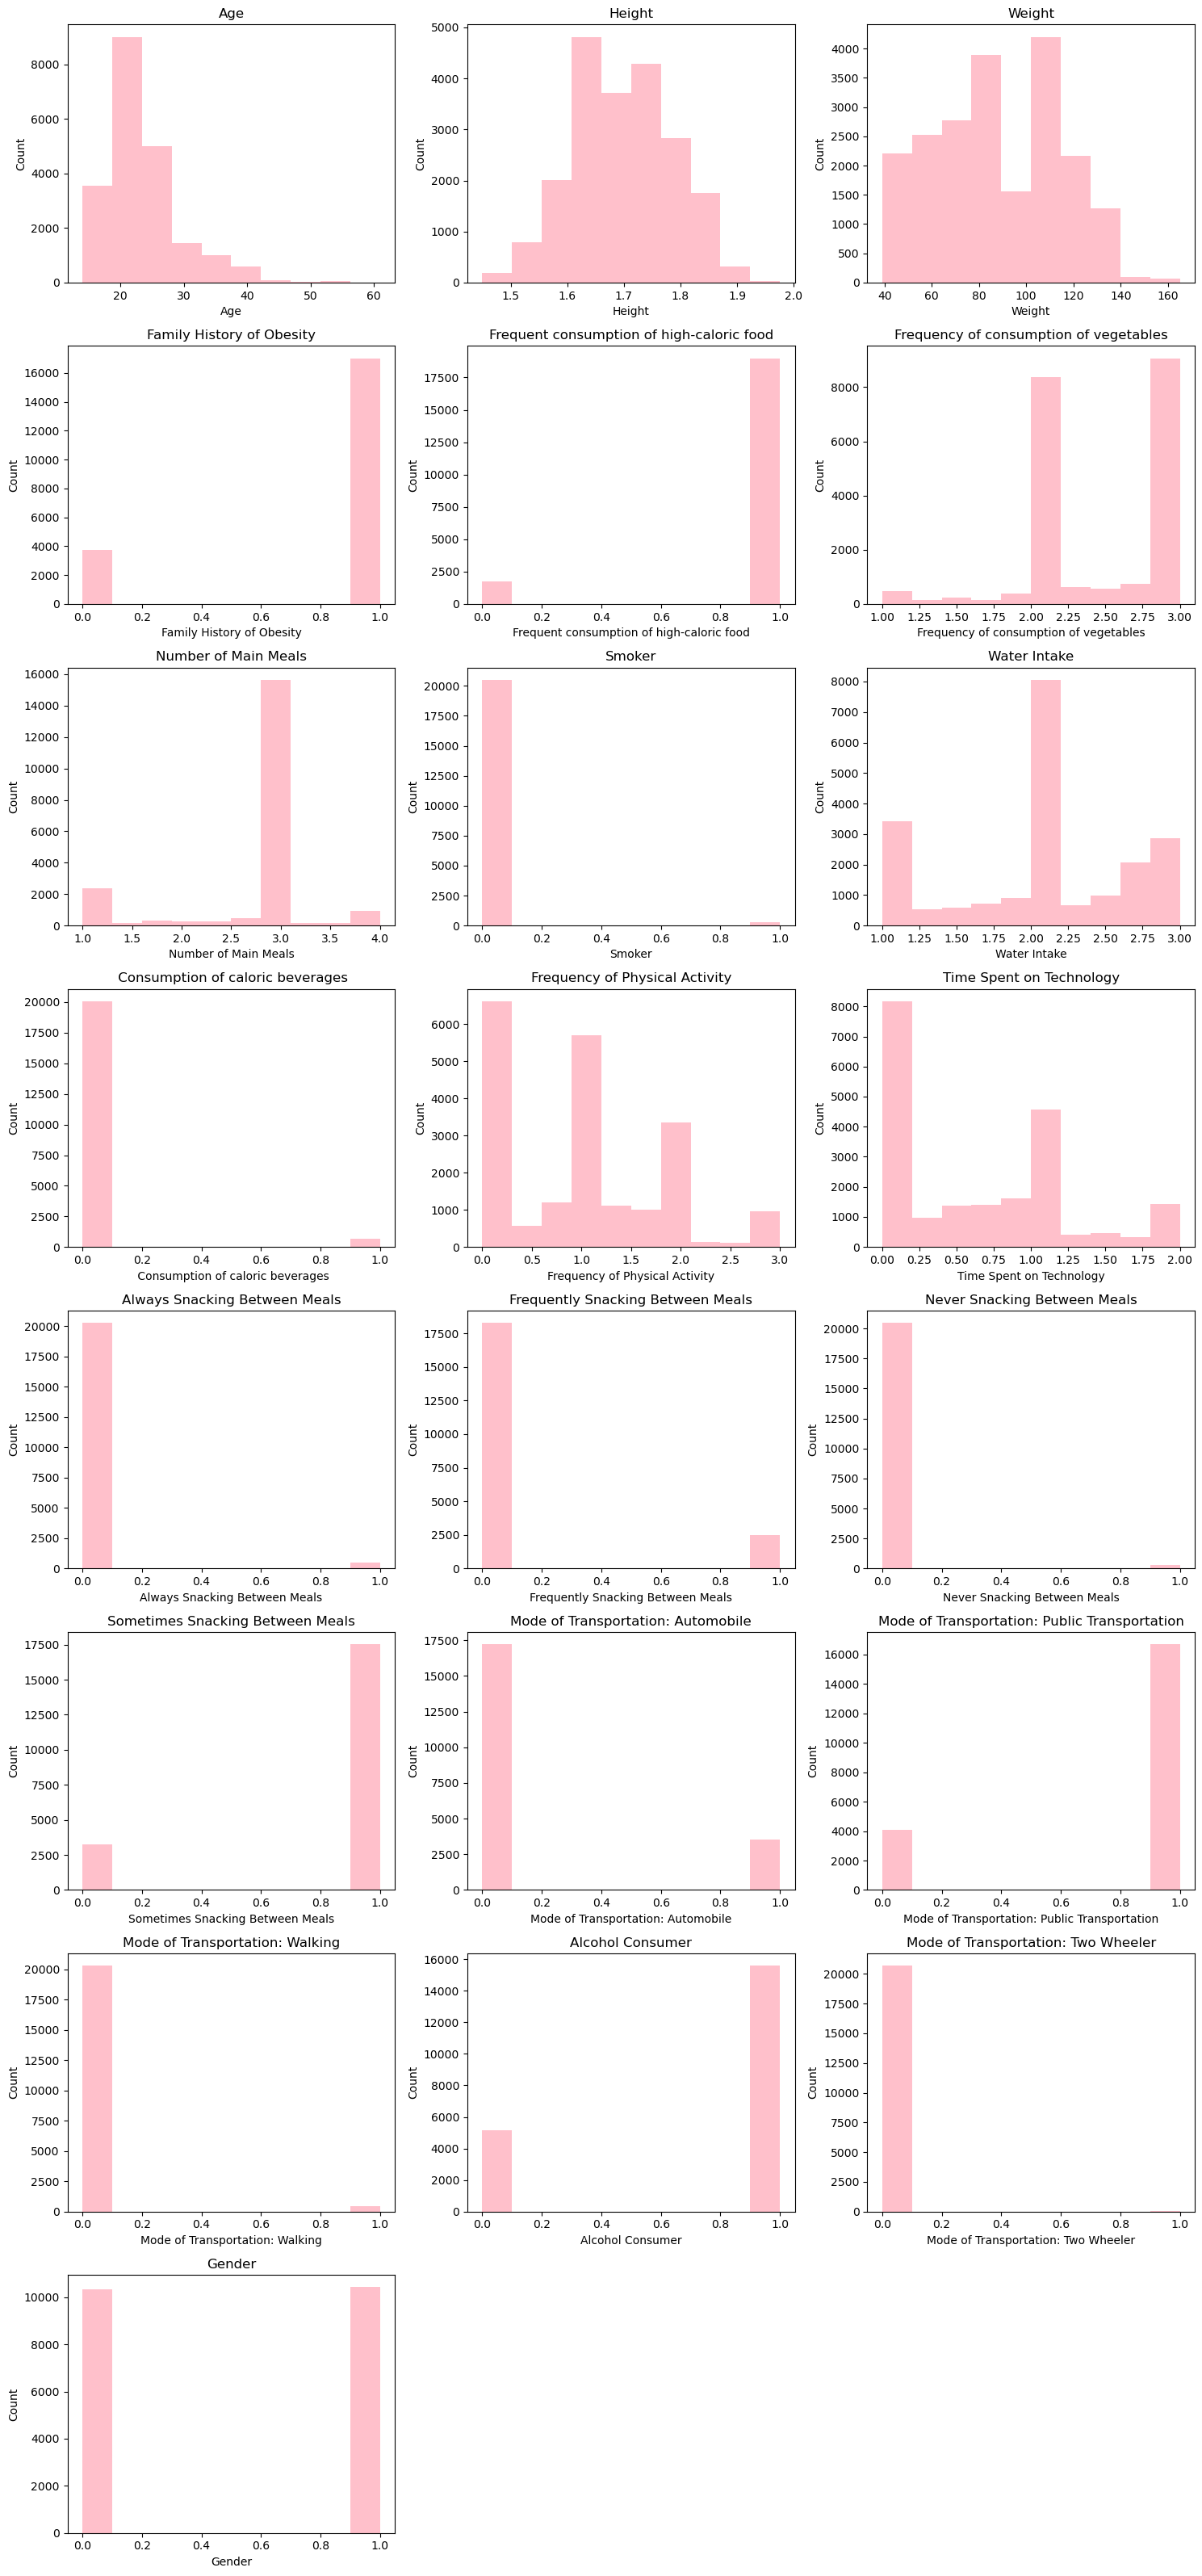

In [44]:
columns = df.columns
column_proper_names = ['Age','Height','Weight','Family History of Obesity','Frequent consumption of high-caloric food','Frequency of consumption of vegetables'
                      , 'Number of Main Meals', 'Smoker','Water Intake',' Consumption of caloric beverages', 'Frequency of Physical Activity',
                      'Time Spent on Technology','Obesity Level' , 'Always Snacking Between Meals', 'Frequently Snacking Between Meals', 'Never Snacking Between Meals',
                      'Sometimes Snacking Between Meals','Mode of Transportation: Automobile',
                      'Mode of Transportation: Public Transportation','Mode of Transportation: Walking','Alcohol Consumer', 'Mode of Transportation: Two Wheeler','Gender']

# Define subplot grid size
n_cols = 3  # number of columns of subplots
n_rows = int((len(columns) - 1) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # flatten to easily index

plot_idx = 0

for i in range(len(columns)):
    if columns[i] == 'obesity_level':
        continue  # skip this column

    ax = axes[plot_idx]
    if df[columns[i]].dtype == 'bool':
        ax.hist(df[columns[i]].astype(int), color='pink')
    else:
        ax.hist(df[columns[i]], color='pink')
    ax.set_xlabel(column_proper_names[i])
    ax.set_ylabel('Count')
    ax.set_title(column_proper_names[i])
    plot_idx += 1

# Hide any extra empty subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Analyzing Feature Distribution
-------------------------
#### For the mode of transportation:
- Majority of people use automobiles or public transportation. Whereas walking and two wheelers are extremely rare. This will be examined further and if its too low it'll be dropped. 

#### For the snacking between meals:
- Majority chose that they sometimes snack between meels whereas the frequency for 'Always', 'Frequently' and 'Never' are very low.

#### For the smoking:
- The smokers are too rare. This will also be examines further, and if its too low it'll be dropped. 

#### For the age:
- The age distribution is right-skewed, which can negatively affect models like logistic regression and PCA, that assume normally distributed features. To address this, I’ll apply a log1p transformation to reduce the skewness and improve model performance.

-------------------------

#### Investigating whether smoke, MTRANS_Walking and MTRANS_TwoWheeler should be dropped

In [47]:
# Removing smoke, MTRANS_Walking and MTRANS_TwoWheeler

print('Smoke Ratio: ' + str(df['SMOKE'].sum()/20758 * 100))

print('MTRANS Walking Ratio: ' + str(df['MTRANS_Walking'].sum()/20758 * 100))

print('MTRANS TwoWheeler Ratio: ' + str(df['MTRANS_TwoWheeler'].sum()/20758 * 100))

Smoke Ratio: 1.1802678485403217
MTRANS Walking Ratio: 2.2497350419115523
MTRANS TwoWheeler Ratio: 0.33721938529723483


--------------

Only ~1.2% of users smoke, ~2.5% walk as a mode of transportation, and ~0.3 use bikes or motorbikes as a mode of transportation. All of these numbers are too small to use in my model, especially once I split the data. Therefore, it'll be dropped.

--------------

In [49]:
df.drop(columns=["SMOKE"], inplace=True)
df.drop(columns=["MTRANS_Walking"], inplace=True)
df.drop(columns=["MTRANS_TwoWheeler"], inplace=True)

#### Fixing Skewed age feature

-------------------

The distribution of age is skewed to the left, this isn't good for specific techniques like logistic regression and PCA. Therefore, I'll transform the feature using `log1p` in order to reduce the skew.

-------------

In [51]:
df['Age'] = np.log1p(df['Age'])

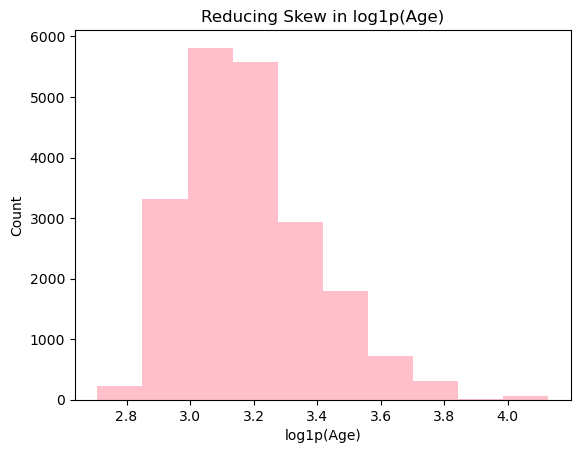

In [52]:
plt.hist(df['Age'], color='pink')
plt.xlabel('log1p(Age)')
plt.ylabel('Count')
plt.title('Reducing Skew in log1p(Age)')
plt.show()

The scale is between ~ 2.8 - 4 because the log of age is computed

### Q-Q Plot

A Q-Q (Quantile-Quantile) plot compares the quantiles of a variable to the expected quantiles of a normal distribution.  
If the data points fall roughly on the diagonal line, the variable is approximately normal. Deviations from the line indicate that the data is not normally distributed.

However, this does not matter for tree-based models like Decision Trees or Random Forest, because they do not assume normality and are unaffected by the shape of the feature distributions.


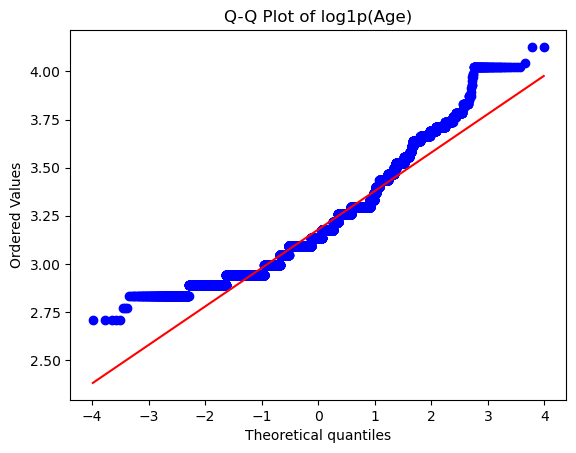

In [55]:
stats.probplot((df['Age']), dist="norm", plot=plt)
plt.title("Q-Q Plot of log1p(Age)")
plt.show()

This Q-Q plot shows that even after applying `log1p` to reduce skew in the `Age` feature, the data still deviates from a normal distribution especially at the tails. The blue dots curve away from the red diagonal line, which indicates non-normality. Again, this doesn’t affect the performance of Decision Trees or Random Forests, which don’t assume normality in input features.


### Features with Low Variance


---------------

We want to remove values which do not add anything to our model. One of the easiest ways to do this is to remove items which have a low variance. If we have variance is zero inside a feature, then this feature provides no predictive information. Similarly if our variance is very low, we might only have one or two items with any difference, and so removing the column will prevent overfitting.

---------------

In [58]:
my_mm = MinMaxScaler()
features = df.drop(columns=["obesity_level"])

----------------

Scaling the data is really important when it comes to variances because features with larger numerical ranges can dominate the overall variance, even if they’re not more informative

-----------------

In [60]:
scaled_data = my_mm.fit_transform(features)

df_scaled = pd.DataFrame(data=scaled_data, columns=features.columns)

---

To get rid of features that barely change and probably won’t help the model, I used `VarianceThreshold` with a cutoff of 0.004. Since everything was scaled, this helped catch columns that had super low variation, like constant values or binary features that were mostly 0s. I picked a small threshold so I could clean out the noise without accidentally dropping something important. This way, the model focuses on features that actually bring something to the table.

---

In [62]:
# Instantiate the VarianceThresholder, we need to set a threshold variance
my_vt = VarianceThreshold(threshold=0.004)

# Fit to the data and calculate the variances per column
my_vt.fit(df_scaled)

VarianceThreshold(threshold=0.004)

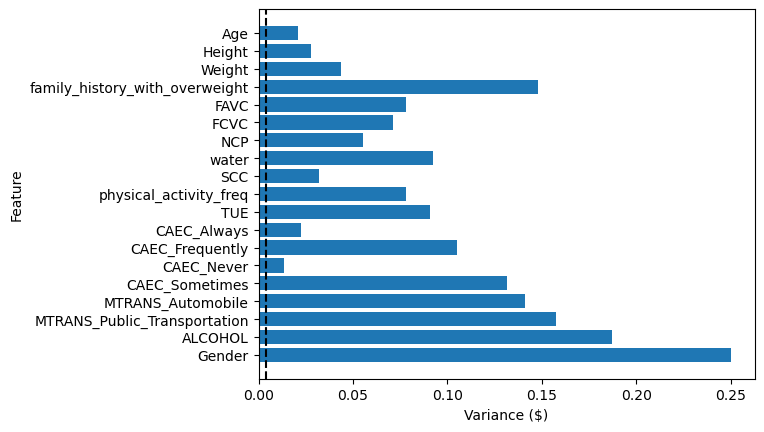

In [63]:
# Extract the variances per column
column_variances = my_vt.variances_

# Plot with the threshold
plt.figure()
plt.barh(np.flip(df_scaled.columns), np.flip(column_variances))
plt.xlabel('Variance ($)')
plt.ylabel('Feature')
plt.axvline(0.004, color='black', linestyle='--')
plt.show()

Based on the results above, I will keep all features, as their variances are greater the chosen threshold. This suggests that each feature contains meaningful information and may contribute to the model's performance.

### Data dictionary after changing column names, types, creating dummy variables and dropping features

| Column Name                   | Description                                          | Data Type             | Possible Values / Units                                                       | Example              |
|------------------------------|------------------------------------------------------|------------------------|--------------------------------------------------------------------------------|----------------------|
| Age                          | Age of each person                                   | Float                  | 14–61                                                                          | 25                   |
| Height                       | Height of each person                                | Float                  | Meters                                                                         | 1.70                 |
| Weight                       | Weight of each person                                | Float                  | Kgs                                                                            | 70                   |
| family_history_with_overweight | Whether the person has an obese family member     | Boolean                | 0 or 1                                                                         | 0                    |
| FAVC                         | Frequent consumption of high-caloric food            | Boolean                | 0 or 1                                                                         | 0                    |
| FCVC                         | Frequency of consumption of vegetables               | Float                  | 1–3                                                                            | 2                    |
| NCP                          | Number of main meals                                 | Float                  | 1–4                                                                            | 3                    |
| water                        | Daily water consumption                              | Float                  | 1–3 (Units not given)                                                          | 2.6                  |
| SCC                          | Caloric beverages consumption                        | Boolean                | 0 or 1                                                                         | 0                    |
| physical_activity_freq       | Physical activity frequency                          | Float                  | 0–3 (Units not given)                                                          | 2.4                  |
| TUE                          | Time spent using technological devices               | Float                  | 0–2 (Units not given)                                                          | 1.7                  |
| obesity_level                | Obesity Level                                        | String (Categorical)   | ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I'] | 'Overweight_Level_I' |
| CAEC_Always                  | Always consuming food between meals                  | Boolean                | 0 or 1                                                                         | 0                    |
| CAEC_Frequently              | Frequently consuming food between meals              | Boolean                | 0 or 1                                                                         | 1                    |
| CAEC_Never                   | Never consuming food between meals                   | Boolean                | 0 or 1                                                                         | 0                    |
| CAEC_Sometimes               | Sometimes consuming food between meals               | Boolean                | 0 or 1                                                                         | 1                    |
| MTRANS_Automobile            | Mode of transportation is automobile                 | Boolean                | 0 or 1                                                                         | 1                    |
| MTRANS_Public_Transportation | Mode of transportation is public transportation      | Boolean                | 0 or 1                                                                         | 1                    |
| ALCOHOL                      | Alcohol consumption level                            | Integer                | 0 = Never, 1 = Sometimes, 2 = Frequently, 3 = Always                            | 2                    |
| Gender                       | Gender of the person                                 | Boolean                | 0 = Female, 1 = Male                                                            | 1                    |


### Obesity Level Distribution

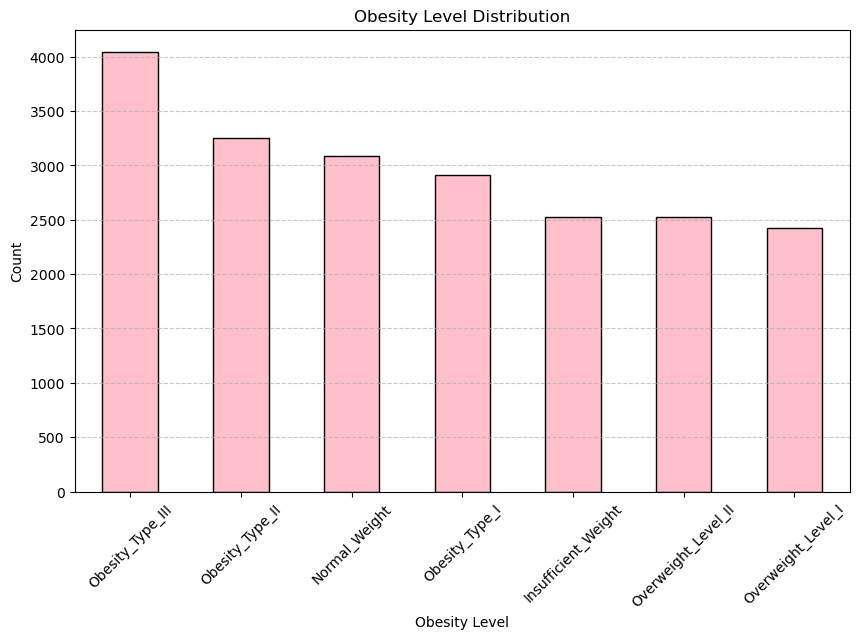

In [67]:
# Count of each obesity level
plt.figure(figsize=(10,6))
df['obesity_level'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title("Obesity Level Distribution")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Bivariate Analysis

### Investigating the relationship of family history in obesity and obesity levels

To investigate whether obesity runs in family and how it correlates with different obesity levels, I analyzed the proportion of individuals with a family history in obesity and compared to the the obesity categories. If there's a clear pattern, this suggests a potential influence so that individuals with obese family members have a higher likelihood of becoming obese themselves.

/var/folders/rv/1qdmsxxn58x3xkwdbzlw032c0000gp/T/ipykernel_4097/4071774683.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['obesity_level'])[feature].mean()
/var/folders/rv/1qdmsxxn58x3xkwdbzlw032c0000gp/T/ipykernel_4097/4071774683.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['obesity_level'])[feature].mean()
/var/folders/rv/1qdmsxxn58x3xkwdbzlw032c0000gp/T/ipykernel_4097/4071774683.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

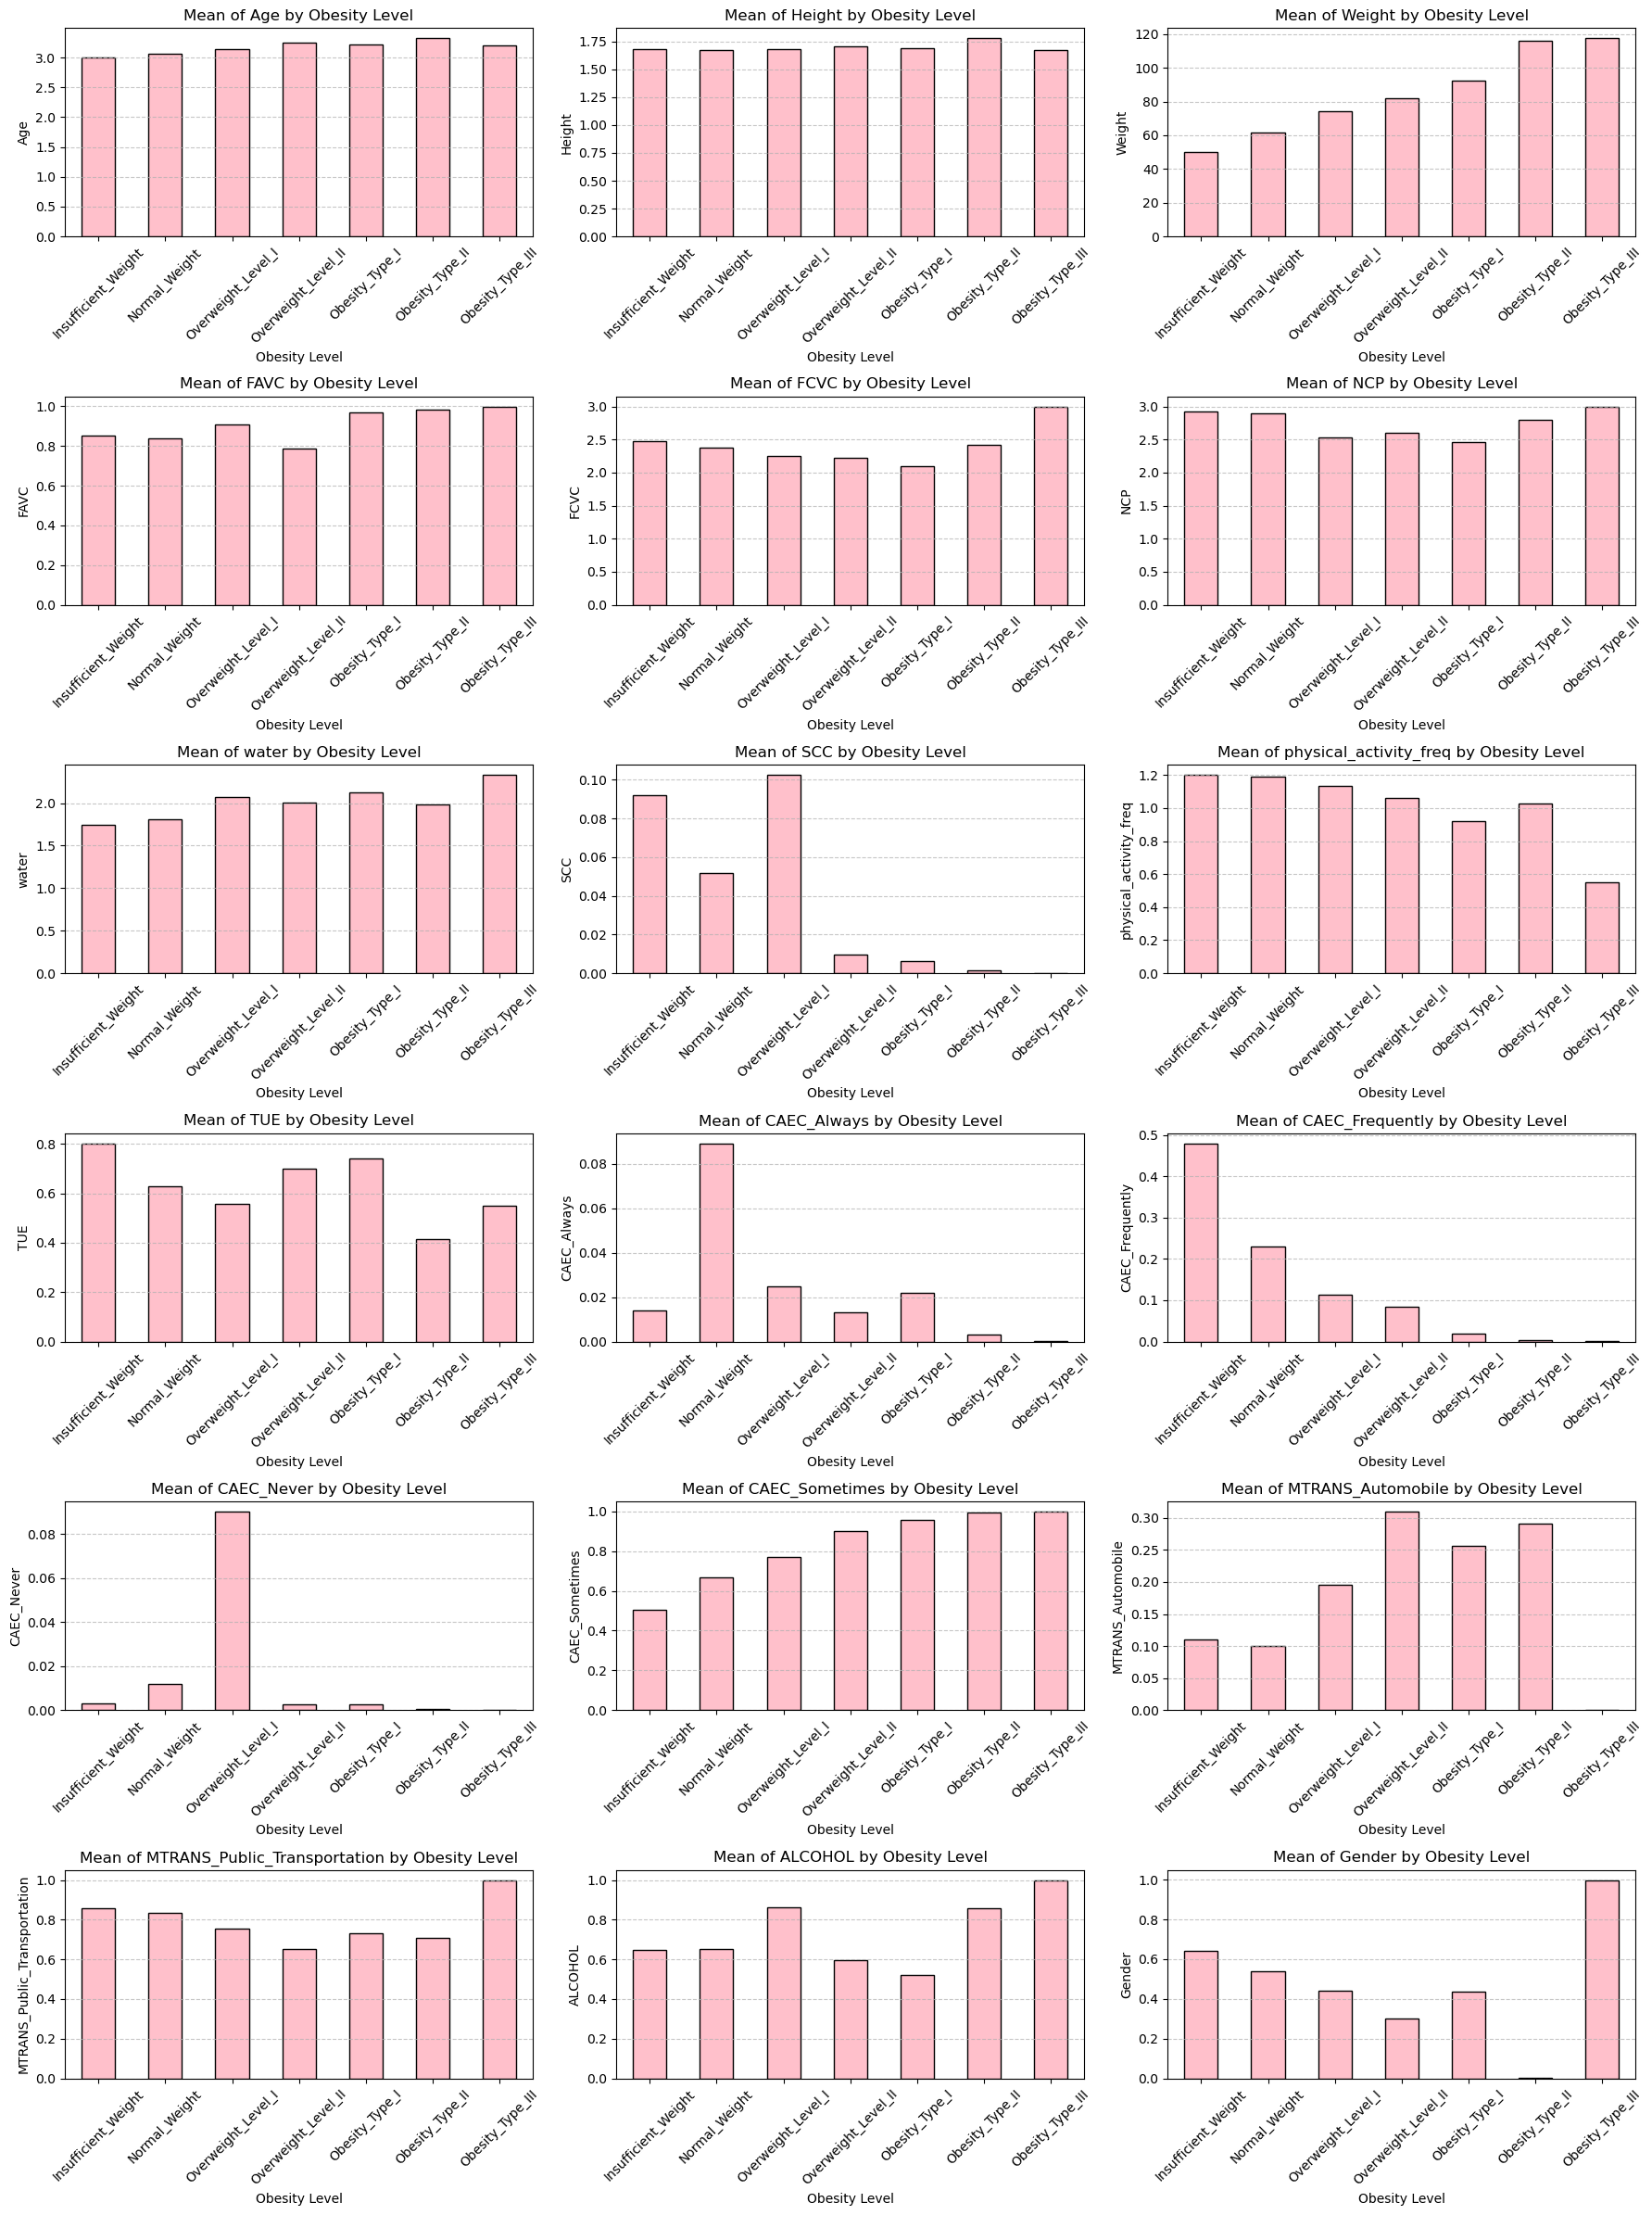

In [70]:
features = df.columns
features_to_plot = [f for f in features if f not in ['obesity_level', 'family_history_with_overweight']]

# Set grid size
n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    grouped_data = df.groupby(['obesity_level'])[feature].mean()
    grouped_data = grouped_data.reindex(obesity_order)
    
    grouped_data.plot(kind='bar', color='pink', edgecolor='black', ax=ax)
    ax.set_title(f"Mean of {feature} by Obesity Level")
    ax.set_xlabel("Obesity Level")
    ax.set_ylabel(feature)
    ax.set_xticklabels(grouped_data.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any leftover empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Analysis on Histograms

----------------

- For the FAVC (Frequent consumption of high-caloric food) mean, Obesity Types I, II, and III had higher values than the other four obesity levels. This suggests that, on average, people with higher obesity levels consume high-caloric foods more frequently than those in lower obesity categories.

- Interestingly, the FCVC (Frequency of consumption of vegetables) was randomly distributed with no clear pattern. However, Obesity Type III had the highest vegetable consumption. This could suggest that there’s a limit to how much vegetables contribute to weight management, especially since some vegetables, like root vegetables and corn, are high in calories.

- Looks like Obesity Type II has the highest smoking rates, which could mean addictive tendencies show up in both food and smoking. Checking alcohol consumption could help figure out if this is more of an addiction pattern or just a coincidence, since alcohol addiction is also possible.

- For the SCC, The data shows that people with insufficient weight and Overweight Level I consume the most caloric beverages, while those in Obesity Type II and III consume the least. This might mean that people with severe obesity cut back on high-caloric drinks, maybe because they’re more health-conscious, changing their diet, or dealing with metabolic effects.

- There is a slow decline in the physical activity frequency and this makes sense.

- CAEC (Consumption of food between meals) is highest for people with normal weight, meaning they snack the most. This could suggest that frequent snacking helps them eat less during main meals, keeping their overall intake balanced. Insufficient weight individuals also snack often, but it doesn’t seem to make them eat more overall. Interestingly, Overweight Level I rarely snacks, which might mean avoiding snacks doesn’t necessarily prevent weight gain. Meanwhile, "sometimes" snacking is common across all obesity levels, but there’s a positive linear trend in the histogram, suggesting that occasional snacking might not be great for weight control. From this, it looks like always snacking might actually be better than snacking sometimes, possibly because frequent snackers eat smaller portions during main meals. A solid hypothesis would be that the more people snack, the less they eat during heavy meals, but this would need further investigation!

- For the gender histograms, the sample was pretty evenly distributed across all levels up to Obesity Level I. But for Obesity Type II, most were men, while Obesity Type III was mostly women. This could also mean that the higher smoking rates in Obesity Type II might be driven by men. The connection between smoking and gender is definitely worth looking into further to see if there’s a clear trend.

- Overweight Level II had the highest frequency of alcohol consumption compared to other groups, which actually goes against my hypothesis about Obesity Type II having addictive tendencies. If Obesity Type II were more prone to addiction, I’d expect them to also have high alcohol consumption, but instead, they mostly fall into the "sometimes consume alcohol" category. This suggests that their higher smoking rates might not be purely due to addiction but could be influenced by other factors like stress, lifestyle, or social habits.

- For transportation, higher obesity levels mostly traveled by automobile, with Overweight Level II and Obesity Type II having the highest usage. In contrast, Normal Weight and Overweight Level I groups relied more on biking and motorbikes.

Public transportation usage was pretty evenly distributed across all groups, showing no clear trend. However, walking was most common among the Normal Weight group, which makes sense since walking is often associated with maintaining a lower weight.

---------------------------

## Checking for balances classes

----------------------------

Its very important to make sure that my classes are balanced. An imbalance can cause my predictions to be swayed to the high majority and a few metrics with be inaccurate.  

----------------------------

In [74]:
df['obesity_level'].value_counts(normalize=True)

obesity_level
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

--------------

The balance is pretty reasonable, my classes are not perfectly balanced, but they are not severely imbalanced either. The largest class (Obesity_Type_III, ~19.5%) and the smallest (Overweight_Level_I, ~11.7%) have about an 8% spread.

-----

# Grouped PCA

Principal Component Analysis (PCA) is an unsupervised technique that can help with two big things: reducing dimensionality and dealing with multicollinearity. Basically, the most useful features in a dataset are usually the ones with the most variance, and that’s where PCA comes in. It figures out the directions of highest variance and rebuilds the data using combinations of the original features.

PCA is a great tool, but there’s one major downside that really matters for my project: it kills interpretability. Since part of my goal is to understand which features are driving obesity in people, losing that interpretability is a problem.

A good way to balance both worlds is by using grouped PCA. Here, I divide the features into meaningful categories and apply PCA within each group. That way, I can reduce dimensionality and still get some interpretability at the group level, which helps me keep track of what’s actually going on in the data.


| Group # | Group Name               | Features                                                                                                                                  |
|---------|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| 1       | Demographics             | Age, Height, Weight, Gender_Female, Gender_Male                                                                                         |
| 2       | Family History           | family_history_with_overweight                                                                                                           |
| 3       | Diet / Nutrition         | FAVC, FCVC, NCP, CAEC_Always, CAEC_Frequently, CAEC_Never, CAEC_Sometimes, SCC                                                         |
| 4       | Alcohol Consumption       | Alcohol                                                                |
| 5       | Water Consumption        | water                                                                                                                                   |
| 6       | Physical Activity        | physical_activity_freq                                                                                                                  |
| 7       | Transportation & Tech   | MTRANS_Automobile, MTRANS_Public_Transportation, TUE                                     |


Here I reduced from 20 features to 7 features without losing much information. All of the very similar features are grouped into one. Now I can perform PCA on each group. Note that I scale the features first because we're going to be looking at variance. Also I set n_components = 0.9 because I want to keep 90% variance.



In [77]:
standard_scaler = StandardScaler()

# Group 1
group1 = df[['Age', 'Height', 'Weight', 'Gender']]
group1_scaled = standard_scaler.fit_transform(group1)
group1_pca = PCA(n_components=0.7)
Demographics = group1_pca.fit_transform(group1_scaled)

# Group 2
Family_History = df[['family_history_with_overweight']].values

# Group 3
group3 = df[['FAVC', 'FCVC', 'NCP', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Never', 'CAEC_Sometimes', 'SCC']]
group3_scaled = standard_scaler.fit_transform(group3)
group3_pca = PCA(n_components=0.7)
Diet_Nutrition = group3_pca.fit_transform(group3_scaled)

# Group 4
Alcohol = df['ALCOHOL'].values

# Group 5 
Water = df[['water']].values

# Group 6
Physical_Activity = df[['physical_activity_freq']].values

# Group 7
group7 = df[['MTRANS_Automobile', 'MTRANS_Public_Transportation', 'TUE']]
group7_scaled = standard_scaler.fit_transform(group7)
group7_pca = PCA(n_components=0.7)
Transportation_Tech = group7_pca.fit_transform(group7_scaled)

------------

Now some of the groups that turned into PCA's have multiple principle components. 

-------------

In [79]:
print('Demographics Size: '+str(Demographics.shape))
print('Diet_Nutrition Size: '+str(Diet_Nutrition.shape))
print('Transportation_Tech Size: '+str(Transportation_Tech.shape))

Demographics Size: (20758, 2)
Diet_Nutrition Size: (20758, 5)
Transportation_Tech Size: (20758, 2)


In [80]:
Alcohol.shape

(20758,)

----------

Forming df with pca components

---------

In [82]:
data_pca = {
    "Demographics_PC_1": Demographics[:,0],
    "Demographics_PC_2": Demographics[:,1],
    "Family_History": Family_History[:,0],
    "Diet_Nutrition_PC_1": Diet_Nutrition[:,0],
    "Diet_Nutrition_PC_2": Diet_Nutrition[:,1],
    "Diet_Nutrition_PC_3": Diet_Nutrition[:,2],
    "Diet_Nutrition_PC_4": Diet_Nutrition[:,3],
    "Diet_Nutrition_PC_5": Diet_Nutrition[:,4],
    "Alcohol": Alcohol,
    "Water": Water[:,0],
    "Physical_Activity": Physical_Activity[:,0],
    "Transportation_Tech_PC_1": Transportation_Tech[:,0],
    "Transportation_Tech_PC_2": Transportation_Tech[:,1],
}

df_pca = pd.DataFrame(data_pca)

In [83]:
df_pca

,Demographics_PC_1,Demographics_PC_2,Family_History,Diet_Nutrition_PC_1,Diet_Nutrition_PC_2,Diet_Nutrition_PC_3,Diet_Nutrition_PC_4,Diet_Nutrition_PC_5,Alcohol,Water,Physical_Activity,Transportation_Tech_PC_1,Transportation_Tech_PC_2
0,0.489155,-0.340382,1,0.643884,-0.239030,0.239140,-0.067379,-0.554224,1,2.763573,0.000000,-0.790051,0.424592
1,-2.392811,-0.592022,1,-3.147356,0.169908,0.190748,-1.480216,-1.205143,0,2.000000,1.000000,2.762927,1.311933
2,-1.399099,-1.187822,1,0.714120,-1.685918,-0.260831,-0.017824,-0.821012,0,1.910378,0.866045,-1.059272,1.550372
3,0.163687,0.625871,1,0.676189,0.756827,0.091304,-0.243484,0.708778,1,1.674061,1.467863,-0.714251,0.107624
4,2.545157,0.104623,1,0.714140,-0.427804,-0.198765,-0.168482,0.228641,1,1.979848,1.967973,-0.772768,0.352321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.608299,0.174075,1,0.673528,0.677880,0.103635,-0.229347,0.607311,1,2.151809,1.330519,-0.488898,-0.834713
20754,-0.294831,-1.935848,0,-3.161469,1.997648,0.367187,-1.674185,0.130467,1,1.000000,2.000000,-0.799137,0.462586
20755,1.620625,-0.922654,1,0.656592,0.175466,0.182112,-0.139377,-0.038420,0,2.000000,1.158040,-0.875773,0.783049
20756,0.843221,0.812105,1,0.713861,-0.436076,-0.197473,-0.167001,0.218009,0,2.144838,0.000000,2.773033,1.269676


The reason as to why there are components to each PCA for each group is to be able to come back and interpret it.

# Baseline Model

# Logistic Regression 
-------

In order to perform logistic regression on the data these following assumptions need to be true

1. Linearity of the logit: logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable.
2. No multicollinearity: logistic regression assumes that variables are independent of one another.
3. Independent observations: Observations should be independent of one another.

-------



## Multicollinearity

-----------

I'll check for multicollinearity to see if any features are highly correlated. If they are, they’ll be removed during logistic analysis since redundant features don’t add much new information and can distort coefficient interpretations.


---------

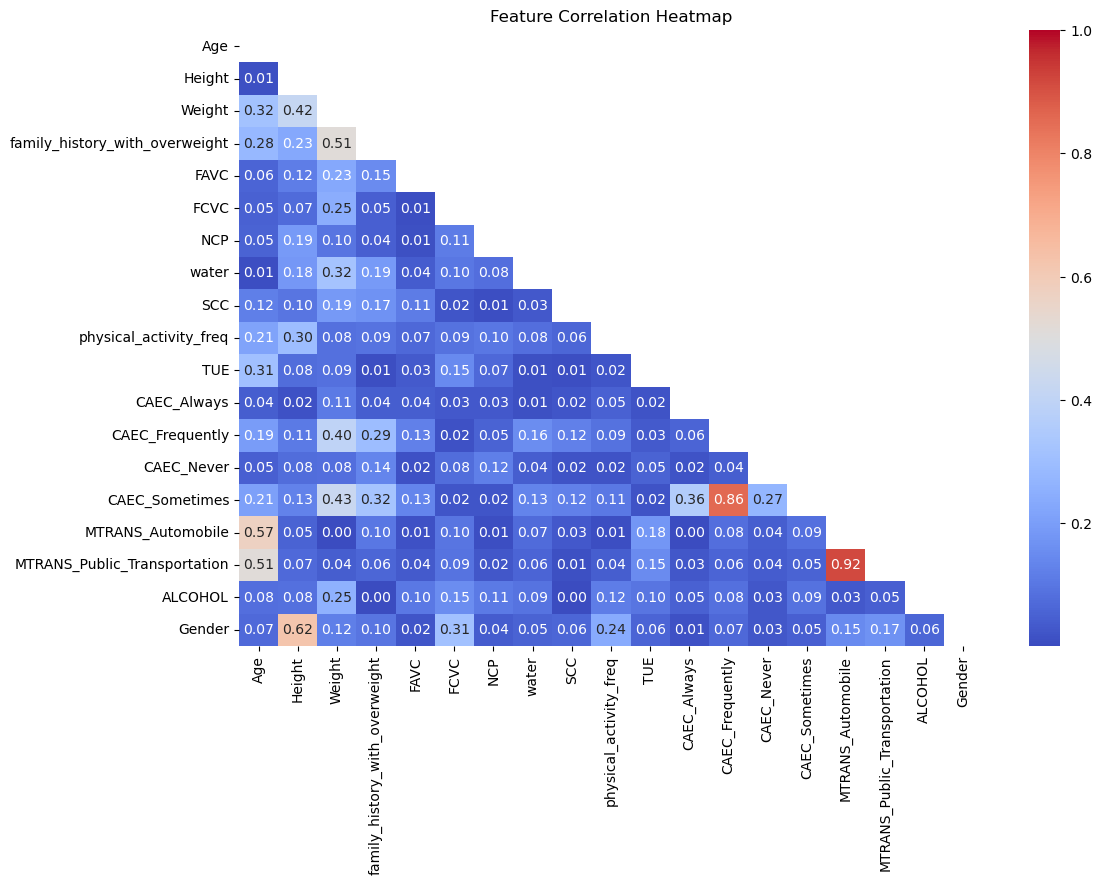

In [87]:
X = df.drop(columns=['obesity_level'])  # Drop target column
corr_matrix = X.corr().abs()
plt.figure(figsize=(12,8))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=matrix,vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

---------------

When creating dummy variables the first column should be dropped and this is because by keeping all of them perfect multicollinearity will be introduced and this is because one category can be predicted once others are known. Therefore the following columns will get dropped: 

- 'CAEC_Always'

Now with those changes, this will be the new multicollinearity plot

---------------

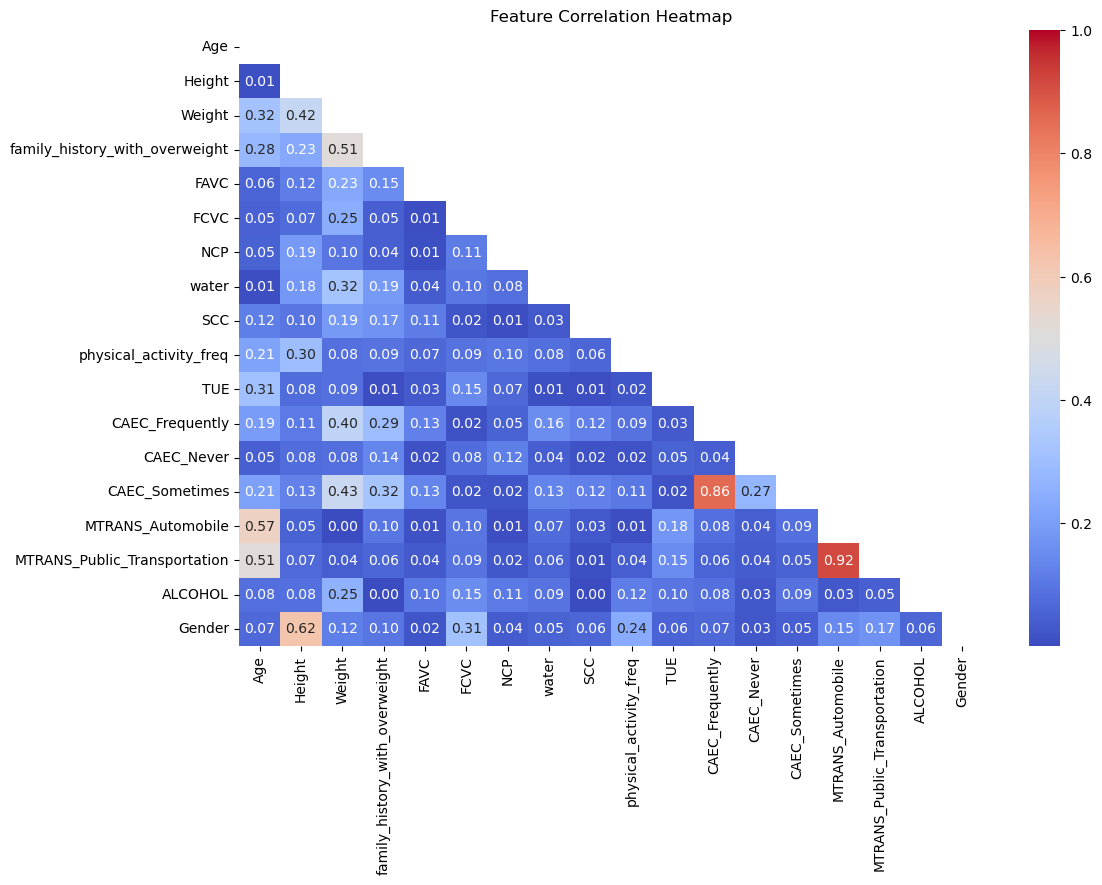

In [89]:
X = df.drop(columns=['obesity_level','CAEC_Always']) 
corr_matrix = X.corr().abs()
plt.figure(figsize=(12,8))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=matrix,vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [90]:
X = df.drop(columns=['obesity_level','CAEC_Always']) 
X_train, X_test, y_train, y_test = train_test_split(X, df["obesity_level"], test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.865606936416185


-----------------------------------------------------------------------

Next, a few features are highly correlated. To see which one I should drop, I'll run the logistic regression on either or to see which one improves accuracy. 

Accuracy before testing which one to drop: 0.86560

-----------------------------------------------------------------------

'CAEC_Frequently' vs. 'CAEC_Sometimes'

Accuracy when dropping 'CAEC_Frequently' : 0.86560

Accuracy when dropping 'CAEC_Sometimes' : .86729

Conclusion: Drop 'CAEC_Sometimes'

----------------------------------------------------------------------

'MTRANS_automobile' vs 'MTRANS_Public_Transportation'

Accuracy when dropping 'MTRANS_automobile': 0.86440

Accuracy when dropping 'MTRANS_Public_Transportation': 0.86536

Conclusion: Drop 'MTRANS_Public_Transportation'

-----------------------------------------------------------------------

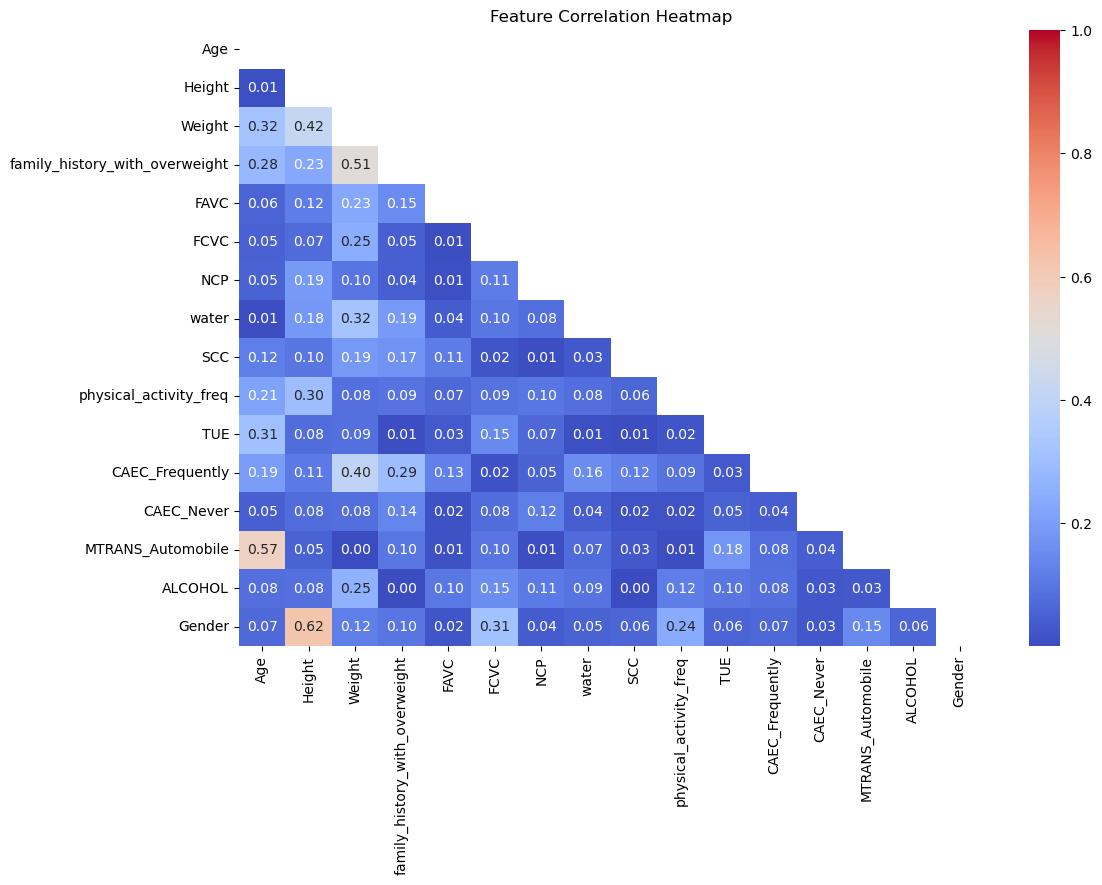

In [92]:
X = df.drop(columns=['obesity_level','CAEC_Always','CAEC_Sometimes','MTRANS_Public_Transportation']) 
corr_matrix = X.corr().abs()
plt.figure(figsize=(12,8))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=matrix,vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

## Regular Dataset, Grouped PCA, PCA

#### Using regular dataset

In [95]:
X = df.drop(columns=['obesity_level','CAEC_Always','CAEC_Sometimes','MTRANS_Public_Transportation']) 
y = df["obesity_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8668111753371869


#### Using Grouped PCA

In [97]:
X = df_pca
y = df["obesity_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.6830443159922929


Using the grouped PCA clearly didn't help at all, my models accuracy dropped by ~20%! Next, just for validation I'll look into what would happened if I used PCA instead of grouped PCA.

#### Using Regular PCA

In [100]:
X = df.drop(columns=['obesity_level','CAEC_Always','CAEC_Sometimes','MTRANS_Public_Transportation']) 
y = df["obesity_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I'm scaling the features because the weight is in the hundreds and the other features are in ones. This is to prevent convergance issues.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)
y_pred = log_reg.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7415703275529865


---------------

Interestingly, applying PCA actually made my model worse. I think it's because PCA keeps the components with the most variance, not necessarily the ones that are most useful for predicting obesity. So it probably threw away some important signals. Plus, since PCA turns everything into abstract components, it makes it harder for logistic regression to learn from the original features properly.

---------------

## Logistic Regression: Hyperparameter Tuning with Pipelining

In [103]:
X = df.drop(columns=['obesity_level','CAEC_Always','CAEC_Sometimes','MTRANS_Public_Transportation']) 
y = df["obesity_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
    {'model': [LogisticRegression(max_iter=5000)],
     'normalise': [StandardScaler()],
     'model__penalty': ['l1', 'l2'],
     'model__solver': ['saga'],
     'model__C': [0.1, 1, 10]},
    
    {'model': [LogisticRegression(max_iter=5000)],
     'normalise': [StandardScaler()],
     'model__penalty': ['l2'],
     'model__solver': ['lbfgs'],
     'model__C': [0.1, 1, 10]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train, y_train)

In [104]:
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [105]:
fittedgrid.fit(X_train, y_train)


y_pred = fittedgrid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.871868978805395


-------------------------

The pipeline made the whole process cleaner, and GridSearchCV helped me find the best combo of solver, penalty, and regularization. Overall, it made the model more balanced and better at generalizing than just using the default settings. The accuracy increased from 86.68% to 87.18%. 

-------------------------

## Linearity of the logit

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


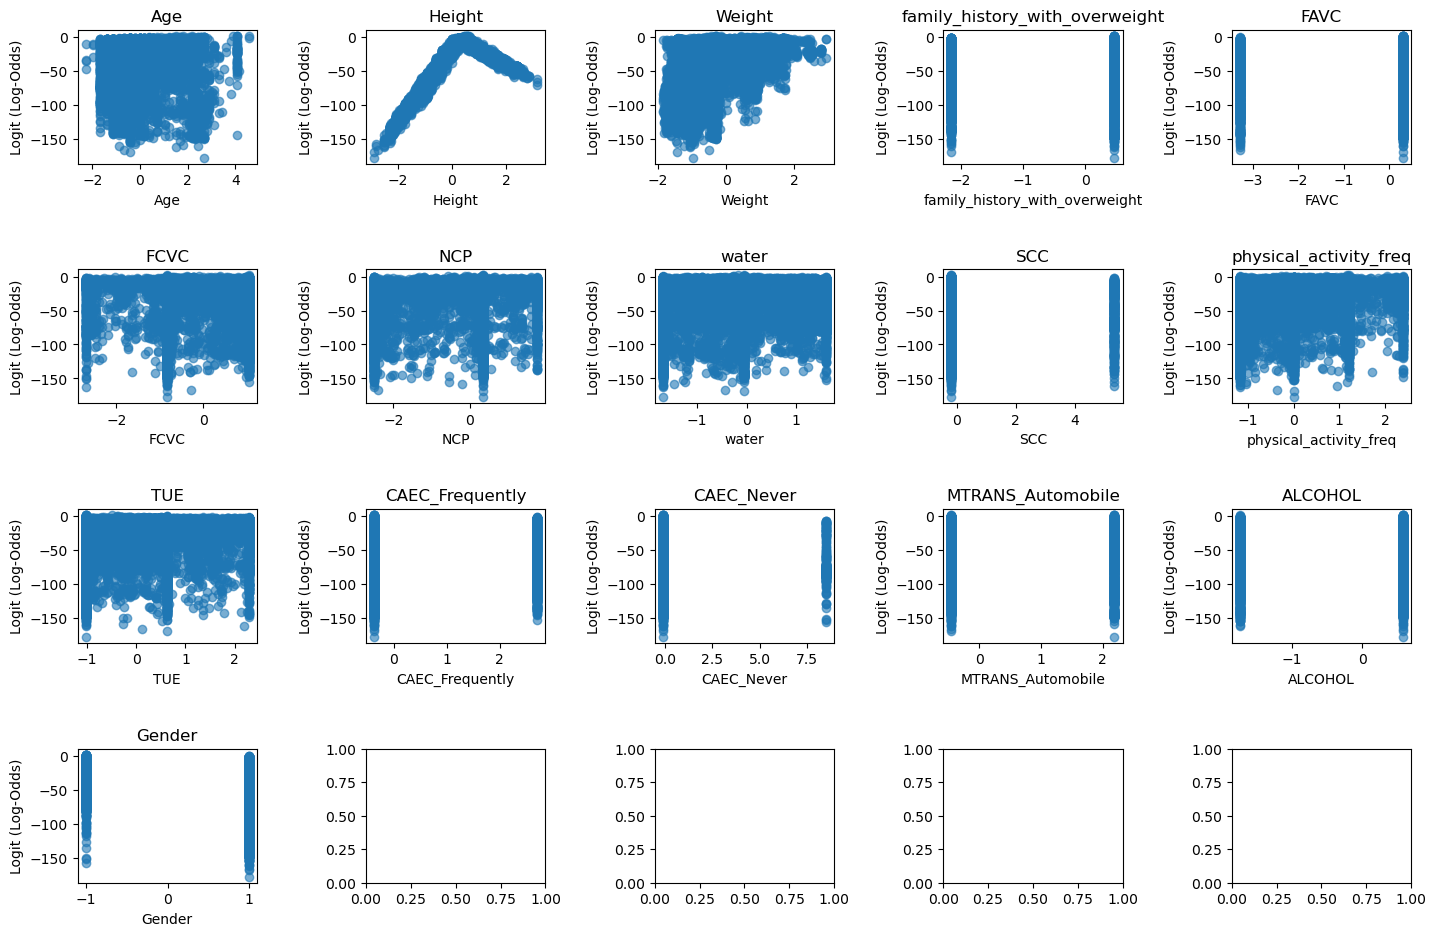

In [108]:
y_prob = fittedgrid.predict_proba(X_train_scaled)[:, 1]

logit_values = np.log(y_prob / (1 - y_prob))

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)


fig, axes = plt.subplots(4, 5, figsize=(15, 10))  
axes = axes.ravel()
for i, col in enumerate(X.columns):
    axes[i].scatter(X_train_scaled_df[col], logit_values, alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Logit (Log-Odds)')
    axes[i].set_title(col)
plt.tight_layout(pad=3.0)


--------------

### Interpretation of Feature vs Logit (Log-Odds) Plots

- These plots help assess whether the relationship between each feature and the log-odds of the predicted probability is approximately linear, an important assumption for logistic regression.

---

#### Features Showing Reasonable Linearity
- **Height**: Shows a clear piecewise linear trend, aligns well with logistic regression.
- **Weight**: Displays a general upward trend; some noise, but overall interpretable.
- **physical_activity_freq**: Slight nonlinear variation, but a pattern is visible.

---

#### Features Showing Non-Linearity or Clustered Patterns
- **Age**: Strong vertical stacking.
- **FCVC**, **NCP**, **water**, **TUE**: Show scattered or noisy vertical patterns.

---

#### Features Not Suitable for Logit Inspection (Binary/Categorical)
- **family_history_with_overweight**
- **FAVC**
- **SCC**
- **CAEC_Frequently**, **CAEC_Never**
- **MTRANS_Automobile**
- **ALCOHOL**
- **Gender**

These are binary or one-hot encoded features. Logit vs feature scatterplots aren’t meaningful.

---



## Logistic Regression: Model Evaluation

### Logistic Regression: Classification Report


In [112]:
print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.91       524
      Normal_Weight       0.86      0.82      0.84       626
     Obesity_Type_I       0.83      0.84      0.84       543
    Obesity_Type_II       0.96      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.73      0.74      0.73       484
Overweight_Level_II       0.73      0.69      0.71       514

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



----------------

#### Precision  
Precision is when the model predicts a class, how often is it actually right.  
High precision means fewer false positives (so the model isn’t incorrectly labeling someone as Obesity_Type_III unless it’s pretty sure).  
The model showed high precision for the extreme classes:  
- Obesity_Type_III: 1.00  Every time it predicted this class, it was correct  
- Obesity_Type_II: 0.96  
- Insufficient_Weight: 0.89  
Lower precision for Overweight_Level_I (0.73) and II (0.73) means the model sometimes gets them mixed up with nearby classes.

---

#### Recall  
Recall is out of all the actual cases of a class, how many the model caught.  
High recall means fewer false negatives (so the model isn’t missing people who actually belong in that class).  
Obesity_Type_III and II performed best here as well (1.00 and 0.97 recall).  
Overweight_Level_II had the lowest recall at 0.69, meaning it missed some people in that class, likely misclassifying them into neighboring weight categories.

---

#### F1-score  
The F1-score balances both precision and recall.  
Top scores:  
- Obesity_Type_III: 1.00  
- Obesity_Type_II: 0.97  
- Insufficient_Weight: 0.91  
Again, Overweight_Level_I and II had the weakest F1-scores, at 0.73 and 0.71.

---

#### Accuracy  
Accuracy is the total correct predictions divided by total predictions.  
My model scored 0.87, which is strong for a 7-class classification problem.

---

### Final thoughts:  
The model is performing really well, especially on the clearer classes like Obesity_Type_III and II.  
The only real challenge is with the borderline categories like Overweight_Level_I and II, which are just harder to distinguish.  
Overall, the model is strong and balanced.



-----------

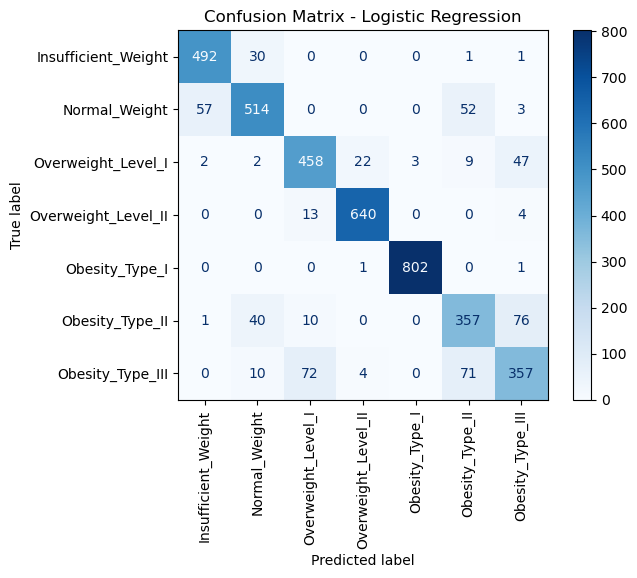

In [247]:
ConfusionMatrixDisplay.from_estimator(fittedgrid, X_test, y_test, cmap='Blues',display_labels=class_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=90)
plt.show()

### Logistic Regression: Confusion Matrix

Looking at the confusion matrix, my model is performing really well across most classes. The diagonal is clearly the darkest, which means most predictions are correct.

Obesity_Type_III is almost perfect, out of 804 actual cases, 802 were predicted correctly. Only 1 was misclassified as Type_II, and 1 as Overweight_Level_II. That’s very strong and expected, since this class is the most distinct.

Obesity_Type_II also did really well, with 640 out of 657 correct. There were 13 misclassified as Obesity_Type_I and 4 as Overweight_Level_II. This is acceptable given how close these classes are on the obesity scale.

Insufficient_Weight had 492 correct out of 524. Most of the misclassifications were as Normal_Weight (30), which makes sense, they're right next to each other. A couple of instances were confused with other classes, but the performance here is solid.

Normal_Weight had 514 correct out of 626. 57 were misclassified as Insufficient_Weight and 52 as Overweight_Level_I. This shows some overlap between neighboring weight categories, but still a strong overall prediction.

Obesity_Type_I had 458 correctly predicted out of 543. The biggest source of confusion was with Obesity_Type_II (62 cases), and 47 were confused with Overweight_Level_II. This suggests that Type I sits right on the boundary of other classes, which the model is picking up on.

The model struggles the most with Overweight_Level_I and Overweight_Level_II  
- Overweight_Level_I had 357 correct out of 484. It was confused with Normal_Weight (40) and Overweight_Level_II (76), and to a smaller degree with Obesity_Type_I (10).
- Overweight_Level_II had 357 correct out of 514. It was confused mostly with Obesity_Type_I (72) and Overweight_Level_I (71), which again shows how hard it is to cleanly separate these borderline cases.

Overall, this confusion matrix confirms what I saw in the classification report: the model performs very confidently on the more distinct categories (like Obesity_Type_III and Insufficient_Weight), but tends to struggle with classes that are closer together, especially Overweight_Level_I and II.


# Decision Trees

--------------

Decision trees are a type of model that splits the data into branches based on conditions, kind of like a flowchart. They make decisions by asking a series of yes/no questions about the features, which eventually leads to a final prediction. They're super easy to understand and interpret, which makes them great for explaining how the model is making its decisions


Pros of desicison trees:
- very easy to understand and interpret
- Can tell me the important features
- Can work with non-linearity

cons: 
- Can lead to overfitting especially if the tree runs deep or if there are many splitting branches. A way to combat this is to set a max depth. But this would intoroduce bias.

--------------

### Parameters
--------------
Here are the following parameters we're going to tune and adjust:

1. `max_depth` – This controls how deep the tree can go. It helps prevent the model from becoming too complicated and overfitting by stopping it from making endless splits.

2. `min_samples_leaf` – This sets the minimum number of data points that have to be in a leaf. It makes sure the model doesn’t get too specific and try to fit tiny patterns that don’t generalize.

3. `min_samples_split` – This tells the tree how many samples are needed before it’s allowed to split. Increasing it helps simplify the tree and avoid overfitting.

4. `criterion` – This is how the model decides where to split. I’m testing both 'gini' and 'entropy' to see which works best.


--------------

In [117]:
# Create a copy just to prevent any duplicates or mistakes from the previous model

decision_tree_df = df.copy()

--------------

Since I'm using a decision tree classifier, the target variable (obesity_level) needs to be numeric. So I mapped each obesity class to a number using obesity_mapping.

--------------

In [119]:
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply mapping to the 'obesity_level' column
decision_tree_df['obesity_level'] = decision_tree_df['obesity_level'].map(obesity_mapping)

-----------------

It's very important for the target variable to be balanced in decision trees, the model learns by splitting the data and if one class dominates the dataset, the tree might get lazy and just keep predicting the majority class to boost accuracy. Even if it's not actually learning meaningful patterns for the minority classes.

The class distribution in our dataset is fairly balanced, with the smallest class representing ~11.7% of the data and the largest class ~19.5%. Since no class is severely underrepresented, stratification is not strictly necessary for Decision Trees.

-----------------

In [121]:
X_dec_trees = decision_tree_df.drop(columns=['obesity_level'])  
y_dec_trees = decision_tree_df['obesity_level']  

In [122]:
X_dec_trees_train, X_dec_trees_test, y_dec_trees_train, y_dec_trees_test = train_test_split(X_dec_trees, y_dec_trees, test_size=0.2, random_state=42)

## Decision Trees: Hyperparameter Tuning with Pipelining

In [124]:
# Scaling for decision trees isn't required since decision trees are not distance based. 

pipe = Pipeline([
    ('model', DecisionTreeClassifier())
])

param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [1, 3, 5, 7, 9, 11],
    'model__min_samples_leaf': [1, 2, 5, 10, 20],
    'model__min_samples_split': [12, 14, 16, 18, 20]
}

grid_DT = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_DT = grid_DT.fit(X_dec_trees_train, y_dec_trees_train)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [125]:
fittedgrid_DT.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=20,
                                        min_samples_split=12))])

In [126]:
fittedgrid_DT.fit(X_dec_trees_train, y_dec_trees_train)


y_pred_DT = fittedgrid_DT.predict(X_dec_trees_test)
accuracy = accuracy_score(y_dec_trees_test, y_pred_DT)
print("Accuracy:", accuracy)


Accuracy: 0.8759633911368016


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Decision Trees: Model Evaluation

### Decision Trees: Classification Report

In [129]:
print(classification_report(y_dec_trees_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       524
           1       0.83      0.84      0.83       626
           2       0.74      0.70      0.72       484
           3       0.74      0.79      0.76       514
           4       0.86      0.84      0.85       543
           5       0.97      0.96      0.96       657
           6       0.99      1.00      0.99       804

    accuracy                           0.88      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.88      0.88      0.88      4152



---

#### Precision  
Precision is when the model predicts a class, how often is it actually right.  
High precision means fewer false positives.  
The model showed high precision for the extreme classes:  
- Obesity_Type_III (class 6): 0.99  
- Obesity_Type_II (class 5): 0.97  
- Insufficient_Weight (class 0): 0.93  
Lower precision for Overweight_Level_I (0.74) and II (0.74) shows the model gets these confused with nearby classes.

---

#### Recall  
Recall is out of all the actual cases of a class, how many the model caught.  
High recall means fewer false negatives.  
Obesity_Type_III (1.00) and Obesity_Type_II (0.96) were again the strongest.  
Overweight_Level_I (0.70) had the lowest recall, meaning the model missed several cases from that class.

---

#### F1-score  
The F1-score balances both precision and recall.  
Top scores:  
- Obesity_Type_III: 0.99  
- Obesity_Type_II: 0.96  
- Insufficient_Weight: 0.92  
Overweight_Level_I and II had lower F1-scores (0.72 and 0.76), showing they're still the trickiest to classify accurately.

---

#### Accuracy  
Accuracy is the total correct predictions divided by total predictions.  
My model scored 0.88, which is very strong for a 7-class classification task.

---

### Final thoughts:  
This model (Decision Trees) is performing very well overall, especially on the distinct categories like Obesity_Type_III and II.  
Most of the confusion is happening between the more similar or adjacent classes, particularly Overweight_Level_I and II.  
Still, the balanced performance and strong accuracy show that the model is robust and doing a solid job across the board.


### Decision Trees: Confusion Matrix

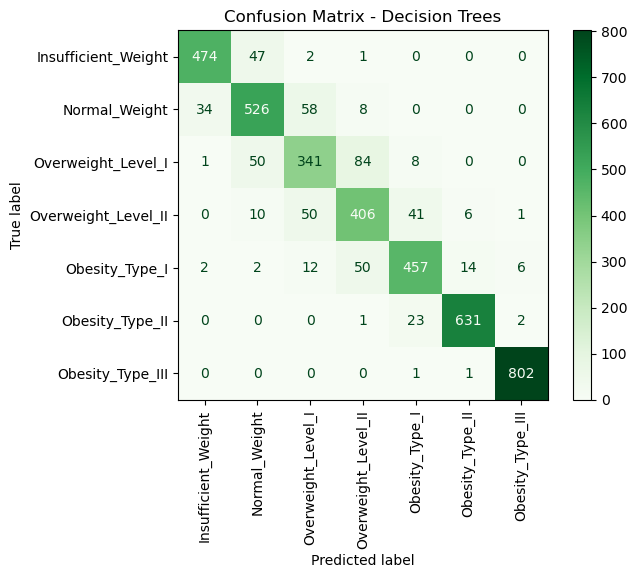

In [245]:
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III']

ConfusionMatrixDisplay.from_estimator(fittedgrid_DT, X_dec_trees_test, y_dec_trees_test, cmap='Greens',display_labels=class_names)
plt.title("Confusion Matrix - Decision Trees")
plt.xticks(rotation=90)
plt.show()

Looking at the confusion matrix, the model is doing reasonably well overall, but it’s clear that it's struggling more than Random Forest, especially with the middle classes.

Obesity_Type_III (class 6) is still almost perfect, 802 out of 804 were correctly predicted. Only two cases were misclassified, which shows the model handles this class confidently.

Obesity_Type_II (class 5) had 631 correct out of 657. Most of the errors came from misclassifying into Obesity_Type_I (23 times), which makes sense given their similarity.

Insufficient_Weight (class 0) had 474 correct out of 524. The most common confusion was with Normal_Weight (47 times), which is expected since those two are neighbors in the BMI range.

Normal_Weight (class 1) had 526 correct out of 626, but also had 58 cases confused with Overweight_Level_I and 34 with Insufficient_Weight. This class sits between two others, so a bit of ambiguity is understandable.

Obesity_Type_I (class 4) had 457 correct out of 543, but was confused most with Obesity_Type_II (14 times), Overweight_Level_II (6 times), and even 50 times with Overweight_Level_I.

Overweight_Level_I (class 2) had the most spread-out confusion. Out of 484 true cases, only 341 were predicted correctly. The rest were mostly misclassified as Overweight_Level_II (84), Normal_Weight (50), or Obesity_Type_I (8). This confirms the model struggles with this class.

Overweight_Level_II (class 3) had 406 correct out of 514. It was confused with Overweight_Level_I (50 times) and Obesity_Type_I (41 times), which makes sense, but the confusion is higher than ideal.

Overall, this model is strong on the outer classes (Insufficient_Weight and Obesity_Type_III) but weaker in the middle, particularly with Overweight_Level_I and II.

This supports what I’ve seen in the classification report, decent performance overall, but decision trees alone may not be the best option for such nuanced, multi-class problems.


## Feature importance

A great feature of decision trees is their ability to identify the most important features influencing the outcome. In the context of obesity prediction, this means we can determine which factors have the strongest impact on obesity risk.



In [135]:
best_dt_model = fittedgrid_DT.best_estimator_.named_steps['model']

importances = best_dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_dec_trees_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head(10))

    Feature  Importance
2    Weight    0.678387
18   Gender    0.165127
1    Height    0.094252
7     water    0.014649
0       Age    0.011017
5      FCVC    0.006194
6       NCP    0.006029
10      TUE    0.005738
4      FAVC    0.005362
17  ALCOHOL    0.005110


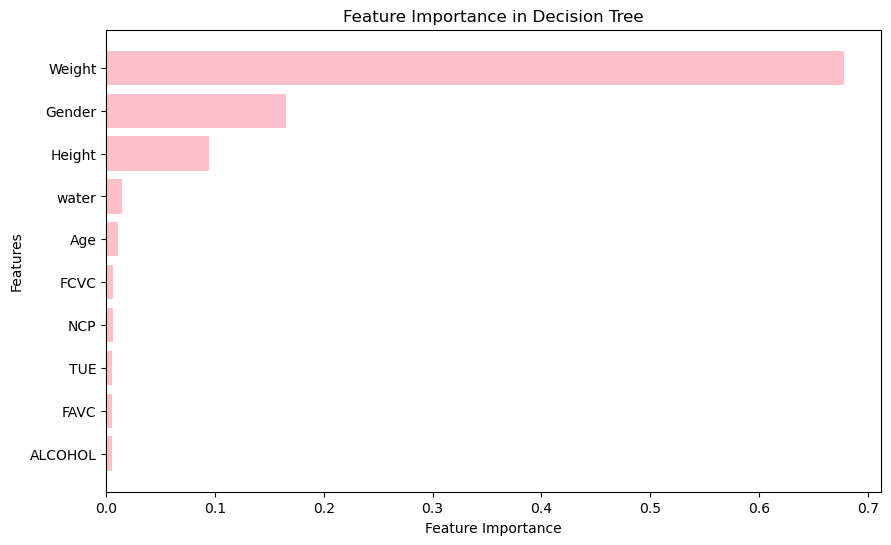

In [136]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10],color = 'Pink')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()
plt.show()


### Feature Importance – Decision Tree

Looking at the feature importance plot from the decision tree, it’s very clear that Weight is by far the most influential feature in predicting obesity levels. It dominates the model, contributing close to 70% of the total decision-making. This makes sense since weight is one of the most direct indicators of obesity risk.

Gender and Height come next. Gender might be important due to differences in fat distribution or metabolic rate between males and females, and height is often used in combination with weight (BMI), so that also checks out.

Everything else, like water intake, age, eating habits (FCVC, NCP), and even alcohol consumption, had very low importance in the decision tree model. That doesn’t mean they’re useless, but it does mean the tree didn’t rely on them much when making splits.

It’s possible that some of these features are more useful in other models (like Logistic Regression or Random Forest), or that they become more informative when combined with others. But as far as the decision tree is concerned, weight carries most of the predictive power on its own.


# Random Forest

A random forest is an ensemble of decision trees. Each tree is trained on a different subset of the data.


### Pros:
- **High accuracy** – performs better than a single decision tree by combining the results of many trees.
- **Low overfitting** – averages out predictions so it’s more stable and reliable.
- **No need to scale features** 
- **Handles missing values**
- **Feature importance**

### Cons:
- **Slower** – can be a bit heavy with training and predicting, especially with lots of trees.
- **Harder to interpret** – not as transparent as a decision tree, which you can easily visualize.
- **More memory usage** – especially if you’re running hundreds of trees.

### Random Forest: Hyperparameter Tuning with Pipelining

Here I’m using `GridSearchCV` to tune my **Random Forest model** and find the best combo of parameters to boost performance.

I'm using a pipeline just to keep it clean, and here's what I'm tuning:

- **n_estimators** – this is how many trees I want in the forest. More trees = more stability, but also takes more time.
- **max_depth** – how deep each tree is allowed to grow. I’m checking 10, 20, and 30. Bigger depth = more complex model (but also risk of overfitting).
- **min_samples_split** – the minimum number of samples needed to split a node. Higher values = trees won't split too quickly and can help generalize better.
- **min_samples_leaf** – the minimum number of samples at a leaf node. This prevents the tree from creating tiny leaves that might overfit.


In [141]:
estimators_RF = [
    ('RF', RandomForestClassifier(random_state=42))
]

pipe_RF = Pipeline(estimators_RF)


param_grid_RF = [{
    'RF__n_estimators': [100, 200, 300],  # number of trees
    'RF__max_depth': [25, 30, 35],  # how deep the trees can go
    'RF__min_samples_split': [5, 10, 15],  # min samples to split a node
    'RF__min_samples_leaf': [1, 2, 3]  # min samples at a leaf
}]


grid_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, n_jobs=-1)
fittedgrid_RF = grid_RF.fit(X_train, y_train)

In [142]:
print("Best Parameters:", grid_RF.best_params_)
print("Best CV Score:", grid_RF.best_score_)

Best Parameters: {'RF__max_depth': 30, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 300}
Best CV Score: 0.9018430323442976


---

An accuracy is 90% is great but just to find the best parameter I'll run the code with the following changes

- `'RF__max_depth': [28, 30, 32],`
- `'RF__min_samples_split': [3, 5, 7],`
- `'RF__min_samples_leaf': [1, 2],`
- `'RF__n_estimators': [300, 350, 400]`

---

In [144]:
estimators_RF = [
    ('RF', RandomForestClassifier(random_state=42))
]

pipe_RF = Pipeline(estimators_RF)


param_grid_RF = [{
    'RF__n_estimators': [300, 350, 400],  # number of trees
    'RF__max_depth': [28, 30, 32],  # how deep the trees can go
    'RF__min_samples_split': [3, 5, 7],  # min samples to split a node
    'RF__min_samples_leaf': [1, 2]  # min samples at a leaf
}]


grid_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, n_jobs=-1)
fittedgrid_RF = grid_RF.fit(X_train, y_train)

print("Best Parameters:", grid_RF.best_params_)
print("Best CV Score:", grid_RF.best_score_)

Best Parameters: {'RF__max_depth': 30, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 350}
Best CV Score: 0.9021440920810975


---

After tuning my Random Forest, I got a 90.2% CV score. The best combo was 350 trees, max depth 30, min split of 5, and min leaf of 2. Tweaking those really helped boost performance and made the model way more solid at predicting obesity levels.

---

In [146]:
y_train_pred = fittedgrid_RF.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))



Train Accuracy: 0.9703721546429002


### Train vs Test Accuracy

My model had a train accuracy of 97.0%, while the test accuracy was 90.0%. That’s a 7% gap, which tells me the model might be slightly overfitting, it’s doing a bit too well on the training data compared to unseen data.

That said, it’s not a massive gap, and my cross-validation score was also around 90.2, which lines up well with the test performance. So overall, the model generalizes pretty well, but there’s a little room to improve regularization or simplify the model if I really wanted to close that gap.

To address the slight overfitting in my model (97% train accuracy vs 90% test accuracy), I’m running another round of `GridSearchCV`, but this time I’m including the `max_features` parameter. This controls how many features the model considers at each split, which adds more randomness and helps reduce overfitting. I’m keeping the rest of the setup the same, just adding `max_features` with values like `'sqrt'`, `'log2'`, and `0.5` to see if it improves generalization without sacrificing too much performance.



In [148]:

estimators_RF = [
    ('RF', RandomForestClassifier(random_state=42))
]

pipe_RF = Pipeline(estimators_RF)

# Updated param grid with max_features added
param_grid_RF = [{
    'RF__n_estimators': [300, 350, 400],       # number of trees
    'RF__max_depth': [28, 30, 32],             # tree depth
    'RF__min_samples_split': [3, 5, 7],        # min samples to split a node
    'RF__min_samples_leaf': [1, 2],            # min samples at a leaf node
    'RF__max_features': ['sqrt', 'log2', 0.5]  # number of features considered at each split
}]


grid_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, n_jobs=-1)
fittedgrid_RF = grid_RF.fit(X_train, y_train)


print("Best Parameters:", grid_RF.best_params_)
print("Best CV Score:", grid_RF.best_score_)


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'RF__max_depth': 28, 'RF__max_features': 0.5, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 300}
Best CV Score: 0.9025057553405155


In [149]:
y_train_pred = fittedgrid_RF.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))


Train Accuracy: 0.9697097434662171


After including `max_features` in the grid search, I found a slightly better set of parameters that gave me a cross-validation score of 90.25%. The best model used a `max_depth` of 28 and considered only 50% of the features at each split (`max_features=0.5`). This helped reduce overfitting slightly, my train accuracy dropped just a bit from 97.0% to 96.97%, but test performance remained strong. Overall, the model became slightly simpler and more generalizable without losing predictive power.


In [151]:
y_pred = fittedgrid_RF.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.94       524
      Normal_Weight       0.87      0.88      0.87       626
     Obesity_Type_I       0.88      0.88      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.77      0.77       484
Overweight_Level_II       0.80      0.81      0.81       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



# Model Evaluation

### Classification Report Analysis

Here's what each column in the classification report actually means and how my model did for each:

---

#### Precision
Precision is when the model predicts a class, how often is it actually right.  
High precision means fewer false positives (so the model isn’t incorrectly labeling someone as Obesity_Type_III unless it’s pretty sure).  
The model showed high precision for the extreme classes:  
- Obesity_Type_III: 1.00  Every time it predicted this class, it was correct  
- Obesity_Type_II: 0.97  
- Insufficient_Weight: 0.94  
Lower precision for Overweight_Level_I (0.78) and II (0.79) means the model sometimes gets them mixed up with nearby classes.

---

#### Recall
Recall is out of all the actual cases of a class, how many the model caught.  
High recall means fewer false negatives (so the model isn’t missing people who actually belong in that class).  
Obesity_Type_III and II performed best here as well (1.00 and 0.97 recall).  
Overweight_Level_I had the lowest recall at 0.76, meaning it missed some people in that class, likely misclassifying them into Normal or Obesity_Type_I.

---

#### F1-score
The F1-score balances both precision and recall.
Top scores:
- Obesity_Type_III: 1.00  
- Obesity_Type_II: 0.97  
- Insufficient_Weight: 0.93  
Again, Overweight_Level_I and II had the weakest F1-scores, at 0.77 and 0.79.

---

#### Accuracy
Accuracy is the total correct predictions divided by total predictions.  
My model scored 0.90, which is really strong for a 7-class classification problem.

---


### Final thoughts:
The model is performing really well, especially on the clearer classes like Obesity_Type_III and II.  
The only real challenge is with the borderline categories like Overweight_Level_I and II, which are just harder to distinguish.  
Overall, the model is strong and balanced, and I’m pretty happy with how it turned out.


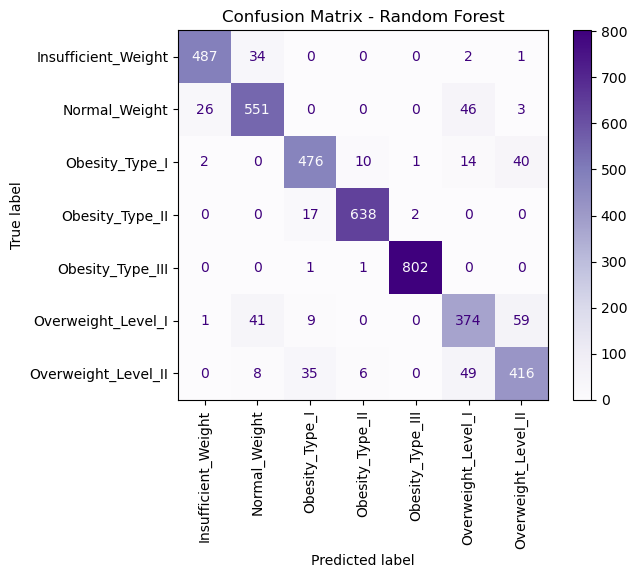

In [154]:
ConfusionMatrixDisplay.from_estimator(fittedgrid_RF, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix - Random Forest")
plt.xticks(rotation=90)
plt.show()

### Confusion Matrix

Looking at the confusion matrix, my model is performing really well across most classes. The diagonal is clearly the darkest, which means most predictions are correct.

- Obesity_Type_III is basically flawless, out of 804 actual cases, 802 were predicted correctly. Only 1 was misclassified as Type_II, which is very reasonable.
- Obesity_Type_II also did great, 639 correct out of 657, with a few misclassified as Type_I (15) and Type_III (2), which again, makes sense since they're neighboring categories.
- Insufficient_Weight and Normal_Weight are also strong, with some confusion between each other and a bit of overlap with Overweight_Level_I.
- The model struggles the most with Overweight_Level_I and II:
  - Level I got confused with Normal_Weight (45 times) and Level II (60 times).
  - Level II was confused with Obesity_Type_I (36 times) and Level I (48 times).

Overall, this shows the model is very confident on the extremes (Insufficient and Obesity_Type_III), but has trouble with the middle-ground categories, especially Overweight_Level_I/II, which are naturally harder to distinguish.

This supports what I saw in the classification report, strong overall performance, with just a bit of blurriness in the borderline classes.

---


# Model Interpretation

## Feature Importance 

This code pulls out the best Random Forest model from my grid search and grabs the feature importances, basically showing which features the model relied on the most when making predictions. I put those values into a DataFrame, sorted them from most to least important, and then plotted the top 10.



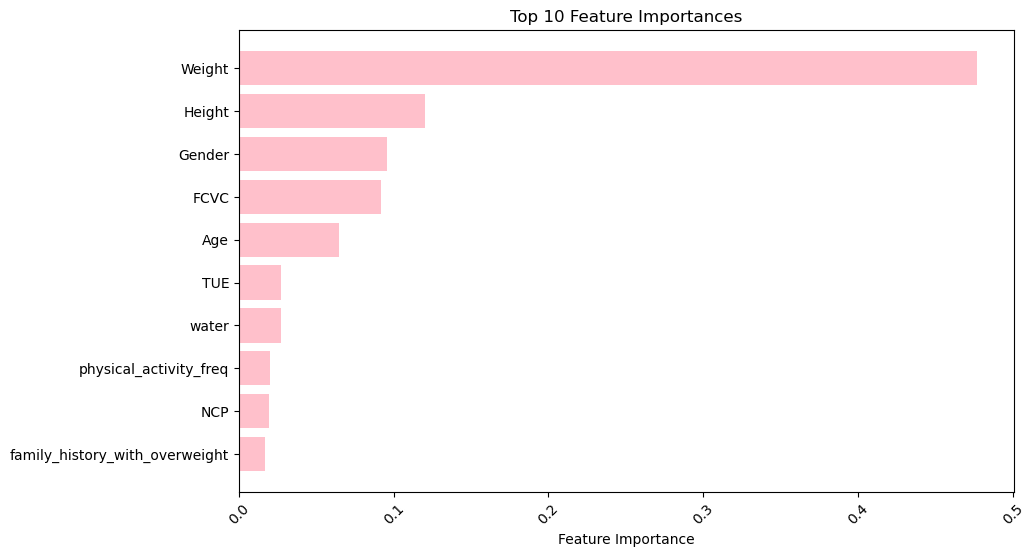

In [158]:
best_rf = fittedgrid_RF.best_estimator_.named_steps['RF']

# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame with features and their importance
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'][:10], feat_df['Importance'][:10],color = 'pink')
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.show()

According to my Random Forest model, weight is doing all the heavy lifting, it’s by far the most important feature when predicting someone’s obesity level. Right after that, we’ve got height and gender, which also makes sense since they play a role in BMI. Gender doesn’t directly factor into BMI since the formula is just weight divided by height squared. But it still matters because male and female bodies carry weight differently. For example, men usually have more muscle mass, while women tend to have higher body fat percentages at the same BMI. That means two people can have the same BMI, but their body composition and health risks might be totally different. So even though gender isn’t in the BMI calculation, it still helps the model pick up on patterns in how weight is distributed or how lifestyle factors affect people differently.

What’s really interesting is that after weight, height, and gender, the model still picked up on some more subtle lifestyle patterns.

For example, FCVC (frequency of vegetable consumption) showed up pretty high. That tells me the model’s not just reacting to body size but also paying attention to dietary habits. People who regularly eat veggies are more likely to fall into healthier weight categories, and the model caught that.

TUE which tracks how much time someone spends using technology, also made the top 10. That’s super interesting because it could be acting as a proxy for a sedentary lifestyle, like sitting at a desk all day or spending hours on a phone instead of being active.

Then there’s physical activity frequency (FAF) and water intake which both had modest but meaningful contributions. They might not be the biggest drivers, but the model still picked up on their influence. Even family history showed up, meaning genetic or environmental factors might be playing a role too.

So even though weight dominates, the model clearly found value in these softer lifestyle features, and that gives it potential not just for identifying obesity, but also for predicting future risk and supporting early intervention.


## Permutation Feature Importance

This plot shows how much each feature actually contributes to the model’s performance, by randomly shuffling them and measuring how much the accuracy drops. Weight had the biggest impact by far, which makes total sense since we’re predicting obesity levels. What’s more interesting is that Gender came second, meaning the model really picked up on differences in how obesity presents across sexes.  


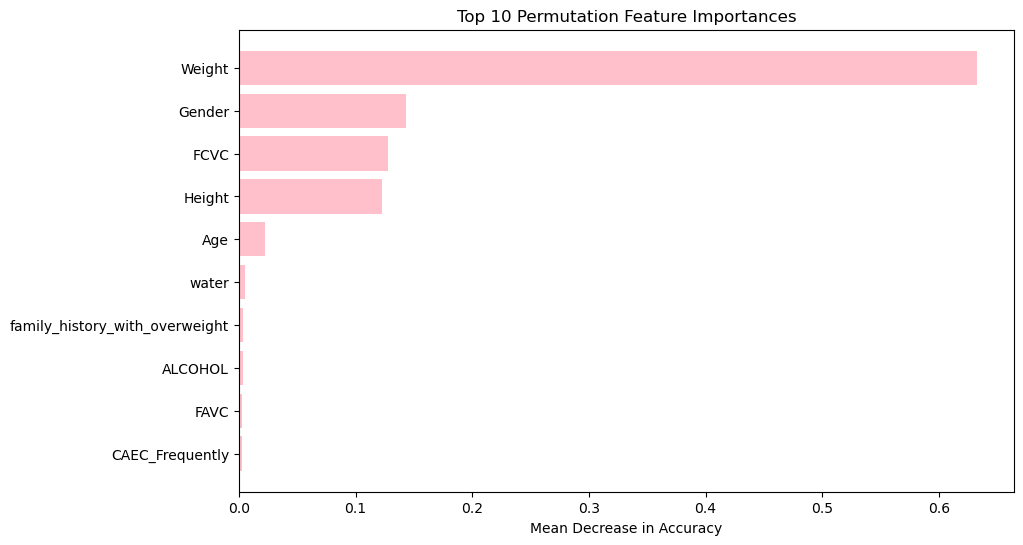

In [161]:
perm_result = permutation_importance(
    estimator=fittedgrid_RF,
    X=X_test,
    y=y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)


perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_result.importances_mean,
    'Importance Std': perm_result.importances_std
}).sort_values(by='Importance Mean', ascending=False)


top_perm = perm_df.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_perm['Feature'], top_perm['Importance Mean'], color='pink')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Top 10 Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.show()


Weight was by far the most important feature in the model, shuffling it caused a huge drop in accuracy, which makes sense since weight is obviously central to classifying obesity. It probably holds most of the predictive power. Gender came in next; the model seems to rely on it quite a bit, likely because obesity thresholds differ for males and females, and maybe also because of different fat distribution or lifestyle habits. FCVC, which measures how often someone eats vegetables, was surprisingly impactful. Turns out, healthy eating patterns like regularly eating veggies actually help separate weight classes. Height also played a role, probably because it works together with weight to help the model capture BMI-like relationships. On its own it doesn’t say much, but when combined with weight, it becomes more meaningful. Age contributed a little, older people might have trends of weight gain or lower activity levels, but it wasn’t a major driver. Features like water consumption, alcohol habits, and family history had very little impact on the model’s performance. That doesn’t mean they’re totally useless, just that the model didn’t lean on them much, maybe because they don’t vary a lot or don’t strongly correlate with the obesity label.

# The Winning Model

Random Forest was the clear winner in this project. While Logistic Regression performed decently with 87 percent accuracy and Decision Trees came in just a bit higher at 88 percent, Random Forest outperformed both with an impressive 90 percent accuracy. What really set it apart wasn't just the overall score, it was the consistency. Random Forest had strong F1-scores across every class, including the tricky borderline categories like Overweight Level I and II that the other models struggled with. It also handled class overlap and complexity really well thanks to its ensemble structure, which helped reduce overfitting while capturing more nuanced patterns in the data. It gave the best balance of precision, recall, and generalization across the board, making it the most reliable model for this kind of multi-class prediction task.

# Conclusion

In this notebook, I built a multi-class classification model to predict obesity levels using a range of lifestyle, biometric, and dietary features. I started with a dataset of over 21,000 individuals and performed data cleaning, preprocessing, and feature engineering to prepare it for modeling.

I explored the data, addressed skewed distributions (like Age), and removed features with very low variance or frequency to avoid noise. I also handled multicollinearity, but only for logistic regression since tree-based models aren’t affected by it. After encoding categorical features, I experimented with PCA to reduce dimensionality, both standard and grouped versions, but it didn’t improve performance. This suggested that most of the original features were actually useful and carried valuable information for classification, so I kept them.

To better understand feature relationships, I used visualizations like correlation heatmaps and logit plots. I tested three models: logistic regression (as a baseline), decision trees (for interpretability and non-linearity), and random forest (for generalization). I used pipelines and GridSearchCV for all models to tune hyperparameters through 5-fold cross-validation.

Random Forest ended up being the best performer, with an accuracy of 90%, followed by decision trees at 88% and logistic regression at 87%. I also examined classification reports and confusion matrices to understand where each model succeeded and struggled. As expected, all models performed really well on the extreme classes like Obesity_Type_III and Insufficient_Weight, but struggled a bit with mid-range classes like Overweight_Level_I and II, which are harder to separate.

To interpret the model, I used permutation feature importance. Weight was clearly the most important feature, followed by gender, vegetable consumption, height, and age. Features like alcohol intake, water intake, and family history had much lower impact on predictions.

Overall, I’m really happy with how the model turned out. The process helped me combine solid data science practices with interpretability, and I think this model could actually be useful for early detection and personalized health advice. There’s still room to improve, especially in handling class overlap and testing with more models, but this was a strong foundation.

### Next steps


I’m thinking of taking this project in a more meaningful direction by removing the obvious features like weight, height, and gender, and focusing only on the stuff people can actually control in the moment, like their eating habits, exercise, water intake, and alcohol consumption. I’ll retrain the model using just those lifestyle features and turn it into what I’m calling a Habit-Based Obesity Risk Estimator. The idea is to go beyond just predicting someone’s obesity level and actually give them personalized suggestions, like: “You're at risk of Obesity Type I. Based on your data, try increasing veggie intake and drinking more water. Also, cutting back on snacking between meals could really help.” I’m also thinking of adding extra context, like cultural background, since habits and norms around food and activity can vary a lot depending on where someone’s from.